In [1]:

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as plt
import os

In [ ]:
train=pd.read_csv("/content/iomtarpspoofnorm.csv",skipinitialspace=True, low_memory=False)

In [ ]:
train=pd.read_csv("/content/iomtddosnorm.csv",skipinitialspace=True, low_memory=False, nrows=100)

In [56]:
train=pd.read_csv("C:/Users/lenovo/Downloads/iomtdosnorm.csv",skipinitialspace=True, low_memory=False)

In [ ]:
train=pd.read_csv("/content/iomtreconnorm.csv",skipinitialspace=True, low_memory=False, nrows=100)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Header_Length    100 non-null    float64
 1   Protocol Type    100 non-null    int64  
 2   Duration         100 non-null    int64  
 3   Rate             100 non-null    float64
 4   Srate            100 non-null    float64
 5   Drate            100 non-null    int64  
 6   fin_flag_number  100 non-null    int64  
 7   syn_flag_number  100 non-null    int64  
 8   rst_flag_number  100 non-null    int64  
 9   psh_flag_number  100 non-null    float64
 10  ack_flag_number  100 non-null    float64
 11  ece_flag_number  100 non-null    int64  
 12  cwr_flag_number  100 non-null    int64  
 13  ack_count        100 non-null    int64  
 14  syn_count        100 non-null    int64  
 15  fin_count        100 non-null    int64  
 16  rst_count        100 non-null    float64
 17  HTTP             

In [57]:
import numpy as np
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train=train.dropna()

train.drop(['label'], axis=1, inplace=True)

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])



In [5]:
import pandas as pd

# Assuming 'train' is your DataFrame and 'Label' is your target variable
correlations = train.corr()['attack'].drop('attack')  # Drop target variable itself
correlations = correlations.abs().sort_values(ascending=False)  # Sort by absolute value

In [6]:
top_features = correlations.head(36).index  # Select top 4 features
selected_data = train[top_features]  # Create a new DataFrame with selected features

In [59]:
features=[
'Variance', 'ack_flag_number', 'Header_Length',
 'Protocol Type','Std',
'AVG','Tot size', 'Tot sum',
'Rate', 'Covariance',
'Duration','HTTP', 'SSH', 'IRC', 'SMTP', 'Telnet']

In [ ]:
#top_features=['seq','mean','stddev','min','max','srate', 'drate','N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP']

In [60]:
y=train['attack']
# Convert categorical labels to numerical using LabelEncoder

#y_train=y_train.astype(float)

X=train[features]
#X=train.drop('attack', axis=1)


In [ ]:
import pandas as pd

def standardize_dataset(df, new_min=0, new_max=255):
    numerical_cols = df.select_dtypes(include=['number']).columns

    # Apply Min-Max scaling to each numerical column
    for col in numerical_cols:
        col_min = df[col].min()
        col_max = df[col].max()

        if col_max == col_min:
            # Column has a constant value, assign new_min
            df[col] = new_min
        else:
            df[col] = (df[col] - col_min) / (col_max - col_min) * (new_max - new_min) + new_min

    return df

# Example usage (replace with your actual X DataFrame)
X = pd.DataFrame(X)
X = standardize_dataset(X)
print(X)

       Variance  ack_flag_number  psh_flag_number  rst_count  Header_Length  \
0           0.0              0.0              0.0   0.000000       0.008665   
1           0.0              0.0              0.0   0.000000       0.008665   
2           0.0              0.0              0.0   0.000000       0.008665   
3           0.0              0.0              0.0   0.000000       0.008665   
4           0.0              0.0              0.0   0.000000       0.008665   
...         ...              ...              ...        ...            ...   
19995     229.5              0.0              0.0   0.000000     254.836033   
19996     255.0              0.0              0.0   0.000000     255.000000   
19997     204.0            127.5             76.5  15.853397     107.112600   
19998     255.0            255.0            127.5  12.531332       3.563698   
19999     229.5            255.0            127.5  41.105294      12.479506   

        Magnitue    TCP    UDP        Max  Protocol

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
test=pd.read_csv("C:/Users/lenovo/Downloads/iomtarpspoofnorm.csv", skipinitialspace=True, low_memory=False)

In [10]:
import numpy as np
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test=test.dropna()
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = test.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])


In [11]:
y_test=test['attack']
# Convert categorical labels to numerical using LabelEncoder

#y_train=y_train.astype(float)

X_test=test[top_features]



In [ ]:
X_test = pd.DataFrame(X_test)
X_test = standardize_dataset(X_test)

In [62]:
from imblearn.over_sampling import SMOTE
def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)

    return X_balanced, y_balanced
(X_train,y_train)=balance_dataset(X_train, y_train)

In [13]:
from imblearn.over_sampling import SMOTE
def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)

    return X_balanced, y_balanced
(X_test,y_test)=balance_dataset(X_test, y_test)

In [63]:
os.chdir("C:/Users/lenovo/")

In [64]:
X_train = pd.DataFrame(X_train)  # Convert to DataFrame

In [65]:
import numpy as np
import tensorflow as tf
from PIL import Image
import os
import csv

In [66]:


labels = ["Normal", "MITM"]
os.chdir("C:/Users/lenovo/")
# Check if the directory exists, if not create it
if not os.path.exists("download1"):
    os.makedirs("download1")

# Change the current working directory
os.chdir("download1")


# Convert the mitmds array to uint8
X_train = X_train.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_train.shape[0]):
    if y_train.iloc[i]==0:
        binary_values = np.unpackbits(X_train.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Normal.{i}.jpg',"JPEG")



In [67]:


labels = ["Normal", "MITM"]
os.chdir("C:/Users/lenovo/")
# Check if the directory exists, if not create it
if not os.path.exists("download1"):
    os.makedirs("download1")

# Change the current working directory
os.chdir("download1")


# Convert the mitmds array to uint8
X_train = X_train.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_train.shape[0]):
    if y_train.iloc[i]==1:
        binary_values = np.unpackbits(X_train.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")



In [68]:


labels = ["Normal", "MITM"]
os.chdir("C:/Users/lenovo/")
# Check if the directory exists, if not create it
if not os.path.exists("download1val"):
    os.makedirs("download1val")

# Change the current working directory
os.chdir("download1val")


# Convert the mitmds array to uint8
X_val = X_val.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_val.shape[0]):
    if y_val.iloc[i]==0:
        binary_values = np.unpackbits(X_val.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Normal.{i}.jpg',"JPEG")



In [69]:


labels = ["Normal", "MITM"]
os.chdir("C:/Users/lenovo/")
# Check if the directory exists, if not create it
if not os.path.exists("download1val"):
    os.makedirs("download1val")

# Change the current working directory
os.chdir("download1val")


# Convert the mitmds array to uint8
X_val = X_val.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_val.shape[0]):
    if y_val.iloc[i]==1:
        binary_values = np.unpackbits(X_val.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")



In [10]:
import numpy as np
from PIL import Image
import os
import pandas as pd # Assuming X_train and y_train are pandas DataFrames/Series

# --- Dummy Data for Demonstration (Replace with your actual X_train, y_train) ---
# Assuming X_train has numerical features that you want to map to pixel values (0-255)
# Let's say each sample has 50 features as an example
num_features_per_sample_example = 36
num_samples_example = 100



labels = ["Normal", "MITM"]
os.chdir("C:/Users/lenovo/")

# Check if the directory exists, if not create it
if not os.path.exists("download1"):
    os.makedirs("download1")

# Change the current working directory
os.chdir("download1")

# Define target image dimensions (consistent with previous discussions for CNN input)
TARGET_IMAGE_HEIGHT = 36
TARGET_IMAGE_WIDTH = 36

# Iterate over each sample in X_train
for i in range(X_train.shape[0]):
    # Only process if the label is 1 (MITM/Attack) as per your original code's if condition
    if y_train.iloc[i] == 1:
        # Get the feature values for the current sample
        # Ensure values are in uint8 (0-255) format.
        # If your X_train values are floats, you'd need to scale them first, e.g.:
        # features_raw = X_train.iloc[i].values
        # features_scaled = ((features_raw - features_raw.min()) / (features_raw.max() - features_raw.min()) * 255).astype(np.uint8)
        # For this example, assuming they are already suitable for direct cast to uint8
        feature_values = X_train.iloc[i].values.astype(np.uint8)

        num_original_features = len(feature_values)

        # --- Strategy to map original features to TARGET_IMAGE_HEIGHT rows ---
        # This handles cases where num_original_features is not exactly TARGET_IMAGE_HEIGHT (36)
        features_for_image_rows = np.zeros(TARGET_IMAGE_HEIGHT, dtype=np.uint8)

        if num_original_features < TARGET_IMAGE_HEIGHT:
            # If fewer features than target height, pad with zeros at the end
            features_for_image_rows[:num_original_features] = feature_values
        elif num_original_features > TARGET_IMAGE_HEIGHT:
            # If more features than target height, truncate to the desired height
            features_for_image_rows = feature_values[:TARGET_IMAGE_HEIGHT]
        else: # num_original_features == TARGET_IMAGE_HEIGHT
            features_for_image_rows = feature_values

        # Create a 2D grayscale image array
        # Each row of the image will be the value of a single feature repeated TARGET_IMAGE_WIDTH times
        grayscale_image_data = np.zeros((TARGET_IMAGE_HEIGHT, TARGET_IMAGE_WIDTH), dtype=np.uint8)

        for r in range(TARGET_IMAGE_HEIGHT):
            # Repeat the feature value (features_for_image_rows[r]) across the entire row
            grayscale_image_data[r, :] = features_for_image_rows[r]

        # Create a 3-channel RGB image by stacking the grayscale data
        # This effectively makes it a grayscale image displayed with 3 channels (R=G=B)
        image_data_rgb = np.stack([grayscale_image_data, grayscale_image_data, grayscale_image_data], axis=-1)

        # Create an image from the array and save it
        # Ensure the filename is unique for each image
        image = Image.fromarray(image_data_rgb, mode='RGB')
        image.save(f'Attack.{i}.jpg', "JPEG")

print("Images generated successfully with fixed row repetition and consistent dimensions.")


Images generated successfully with fixed row repetition and consistent dimensions.


In [9]:
import numpy as np
from PIL import Image
import os
import pandas as pd # Assuming X_train and y_train are pandas DataFrames/Series

# --- Dummy Data for Demonstration (Replace with your actual X_train, y_train) ---
# Assuming X_train has numerical features that you want to map to pixel values (0-255)
# Let's say each sample has 50 features as an example
num_features_per_sample_example = 36
num_samples_example = 100



labels = ["Normal", "MITM"]
os.chdir("/home/studio-lab-user/")

# Check if the directory exists, if not create it
if not os.path.exists("download1"):
    os.makedirs("download1")

# Change the current working directory
os.chdir("download1")

# Define target image dimensions (consistent with previous discussions for CNN input)
TARGET_IMAGE_HEIGHT = 36
TARGET_IMAGE_WIDTH = 36

# Iterate over each sample in X_train
for i in range(X_train.shape[0]):
    # Only process if the label is 1 (MITM/Attack) as per your original code's if condition
    if y_train.iloc[i] == 0:
        # Get the feature values for the current sample
        # Ensure values are in uint8 (0-255) format.
        # If your X_train values are floats, you'd need to scale them first, e.g.:
        # features_raw = X_train.iloc[i].values
        # features_scaled = ((features_raw - features_raw.min()) / (features_raw.max() - features_raw.min()) * 255).astype(np.uint8)
        # For this example, assuming they are already suitable for direct cast to uint8
        feature_values = X_train.iloc[i].values.astype(np.uint8)

        num_original_features = len(feature_values)

        # --- Strategy to map original features to TARGET_IMAGE_HEIGHT rows ---
        # This handles cases where num_original_features is not exactly TARGET_IMAGE_HEIGHT (36)
        features_for_image_rows = np.zeros(TARGET_IMAGE_HEIGHT, dtype=np.uint8)

        if num_original_features < TARGET_IMAGE_HEIGHT:
            # If fewer features than target height, pad with zeros at the end
            features_for_image_rows[:num_original_features] = feature_values
        elif num_original_features > TARGET_IMAGE_HEIGHT:
            # If more features than target height, truncate to the desired height
            features_for_image_rows = feature_values[:TARGET_IMAGE_HEIGHT]
        else: # num_original_features == TARGET_IMAGE_HEIGHT
            features_for_image_rows = feature_values

        # Create a 2D grayscale image array
        # Each row of the image will be the value of a single feature repeated TARGET_IMAGE_WIDTH times
        grayscale_image_data = np.zeros((TARGET_IMAGE_HEIGHT, TARGET_IMAGE_WIDTH), dtype=np.uint8)

        for r in range(TARGET_IMAGE_HEIGHT):
            # Repeat the feature value (features_for_image_rows[r]) across the entire row
            grayscale_image_data[r, :] = features_for_image_rows[r]

        # Create a 3-channel RGB image by stacking the grayscale data
        # This effectively makes it a grayscale image displayed with 3 channels (R=G=B)
        image_data_rgb = np.stack([grayscale_image_data, grayscale_image_data, grayscale_image_data], axis=-1)

        # Create an image from the array and save it
        # Ensure the filename is unique for each image
        image = Image.fromarray(image_data_rgb, mode='RGB')
        image.save(f'Normal.{i}.jpg', "JPEG")

print("Images generated successfully with fixed row repetition and consistent dimensions.")


Images generated successfully with fixed row repetition and consistent dimensions.


In [11]:
import numpy as np
from PIL import Image
import os
import pandas as pd # Assuming X_train and y_train are pandas DataFrames/Series

# --- Dummy Data for Demonstration (Replace with your actual X_train, y_train) ---
# Assuming X_train has numerical features that you want to map to pixel values (0-255)
# Let's say each sample has 50 features as an example
num_features_per_sample_example = 36
num_samples_example = 100



labels = ["Normal", "MITM"]
os.chdir("C:/Users/lenovo/")

# Check if the directory exists, if not create it
if not os.path.exists("download1val"):
    os.makedirs("download1val")

# Change the current working directory
os.chdir("download1val")

# Define target image dimensions (consistent with previous discussions for CNN input)
TARGET_IMAGE_HEIGHT = 36
TARGET_IMAGE_WIDTH = 36

# Iterate over each sample in X_train
for i in range(X_val.shape[0]):
    # Only process if the label is 1 (MITM/Attack) as per your original code's if condition
    if y_val.iloc[i] == 0:
        # Get the feature values for the current sample
        # Ensure values are in uint8 (0-255) format.
        # If your X_train values are floats, you'd need to scale them first, e.g.:
        # features_raw = X_train.iloc[i].values
        # features_scaled = ((features_raw - features_raw.min()) / (features_raw.max() - features_raw.min()) * 255).astype(np.uint8)
        # For this example, assuming they are already suitable for direct cast to uint8
        feature_values = X_val.iloc[i].values.astype(np.uint8)

        num_original_features = len(feature_values)

        # --- Strategy to map original features to TARGET_IMAGE_HEIGHT rows ---
        # This handles cases where num_original_features is not exactly TARGET_IMAGE_HEIGHT (36)
        features_for_image_rows = np.zeros(TARGET_IMAGE_HEIGHT, dtype=np.uint8)

        if num_original_features < TARGET_IMAGE_HEIGHT:
            # If fewer features than target height, pad with zeros at the end
            features_for_image_rows[:num_original_features] = feature_values
        elif num_original_features > TARGET_IMAGE_HEIGHT:
            # If more features than target height, truncate to the desired height
            features_for_image_rows = feature_values[:TARGET_IMAGE_HEIGHT]
        else: # num_original_features == TARGET_IMAGE_HEIGHT
            features_for_image_rows = feature_values

        # Create a 2D grayscale image array
        # Each row of the image will be the value of a single feature repeated TARGET_IMAGE_WIDTH times
        grayscale_image_data = np.zeros((TARGET_IMAGE_HEIGHT, TARGET_IMAGE_WIDTH), dtype=np.uint8)

        for r in range(TARGET_IMAGE_HEIGHT):
            # Repeat the feature value (features_for_image_rows[r]) across the entire row
            grayscale_image_data[r, :] = features_for_image_rows[r]

        # Create a 3-channel RGB image by stacking the grayscale data
        # This effectively makes it a grayscale image displayed with 3 channels (R=G=B)
        image_data_rgb = np.stack([grayscale_image_data, grayscale_image_data, grayscale_image_data], axis=-1)

        # Create an image from the array and save it
        # Ensure the filename is unique for each image
        image = Image.fromarray(image_data_rgb, mode='RGB')
        image.save(f'Normal.{i}.jpg', "JPEG")

print("Images generated successfully with fixed row repetition and consistent dimensions.")


Images generated successfully with fixed row repetition and consistent dimensions.


In [ ]:
import numpy as np
from PIL import Image
import os
import pandas as pd # Assuming X_train and y_train are pandas DataFrames/Series

# --- Dummy Data for Demonstration (Replace with your actual X_train, y_train) ---
# Assuming X_train has numerical features that you want to map to pixel values (0-255)
# Let's say each sample has 50 features as an example
num_features_per_sample_example = 36
num_samples_example = 100



labels = ["Normal", "MITM"]
os.chdir("/content/")

# Check if the directory exists, if not create it
if not os.path.exists("download2"):
    os.makedirs("download2")

# Change the current working directory
os.chdir("download2")

# Define target image dimensions (consistent with previous discussions for CNN input)
TARGET_IMAGE_HEIGHT = 36
TARGET_IMAGE_WIDTH = 36

# Iterate over each sample in X_train
for i in range(X_test.shape[0]):
    # Only process if the label is 1 (MITM/Attack) as per your original code's if condition
    if y_test.iloc[i] == 1:
        # Get the feature values for the current sample
        # Ensure values are in uint8 (0-255) format.
        # If your X_train values are floats, you'd need to scale them first, e.g.:
        # features_raw = X_train.iloc[i].values
        # features_scaled = ((features_raw - features_raw.min()) / (features_raw.max() - features_raw.min()) * 255).astype(np.uint8)
        # For this example, assuming they are already suitable for direct cast to uint8
        feature_values = X_test.iloc[i].values.astype(np.uint8)

        num_original_features = len(feature_values)

        # --- Strategy to map original features to TARGET_IMAGE_HEIGHT rows ---
        # This handles cases where num_original_features is not exactly TARGET_IMAGE_HEIGHT (36)
        features_for_image_rows = np.zeros(TARGET_IMAGE_HEIGHT, dtype=np.uint8)

        if num_original_features < TARGET_IMAGE_HEIGHT:
            # If fewer features than target height, pad with zeros at the end
            features_for_image_rows[:num_original_features] = feature_values
        elif num_original_features > TARGET_IMAGE_HEIGHT:
            # If more features than target height, truncate to the desired height
            features_for_image_rows = feature_values[:TARGET_IMAGE_HEIGHT]
        else: # num_original_features == TARGET_IMAGE_HEIGHT
            features_for_image_rows = feature_values

        # Create a 2D grayscale image array
        # Each row of the image will be the value of a single feature repeated TARGET_IMAGE_WIDTH times
        grayscale_image_data = np.zeros((TARGET_IMAGE_HEIGHT, TARGET_IMAGE_WIDTH), dtype=np.uint8)

        for r in range(TARGET_IMAGE_HEIGHT):
            # Repeat the feature value (features_for_image_rows[r]) across the entire row
            grayscale_image_data[r, :] = features_for_image_rows[r]

        # Create a 3-channel RGB image by stacking the grayscale data
        # This effectively makes it a grayscale image displayed with 3 channels (R=G=B)
        image_data_rgb = np.stack([grayscale_image_data, grayscale_image_data, grayscale_image_data], axis=-1)

        # Create an image from the array and save it
        # Ensure the filename is unique for each image
        image = Image.fromarray(image_data_rgb, mode='RGB')
        image.save(f'Attack.{i}.jpg', "JPEG")

print("Images generated successfully with fixed row repetition and consistent dimensions.")


/tmp/ipython-input-21-3632885725.py:69: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data_rgb, mode='RGB')


Images generated successfully with fixed row repetition and consistent dimensions.


In [ ]:
import numpy as np
from PIL import Image
import os
import pandas as pd # Assuming X_train and y_train are pandas DataFrames/Series

# --- Dummy Data for Demonstration (Replace with your actual X_train, y_train) ---
# Assuming X_train has numerical features that you want to map to pixel values (0-255)
# Let's say each sample has 50 features as an example
num_features_per_sample_example = 36
num_samples_example = 100



labels = ["Normal", "MITM"]
os.chdir("/content/")

# Check if the directory exists, if not create it
if not os.path.exists("download2"):
    os.makedirs("download2")

# Change the current working directory
os.chdir("download2")

# Define target image dimensions (consistent with previous discussions for CNN input)
TARGET_IMAGE_HEIGHT = 36
TARGET_IMAGE_WIDTH = 36

# Iterate over each sample in X_train
for i in range(X_test.shape[0]):
    # Only process if the label is 1 (MITM/Attack) as per your original code's if condition
    if y_test.iloc[i] == 0:
        # Get the feature values for the current sample
        # Ensure values are in uint8 (0-255) format.
        # If your X_train values are floats, you'd need to scale them first, e.g.:
        # features_raw = X_train.iloc[i].values
        # features_scaled = ((features_raw - features_raw.min()) / (features_raw.max() - features_raw.min()) * 255).astype(np.uint8)
        # For this example, assuming they are already suitable for direct cast to uint8
        feature_values = X_test.iloc[i].values.astype(np.uint8)

        num_original_features = len(feature_values)

        # --- Strategy to map original features to TARGET_IMAGE_HEIGHT rows ---
        # This handles cases where num_original_features is not exactly TARGET_IMAGE_HEIGHT (36)
        features_for_image_rows = np.zeros(TARGET_IMAGE_HEIGHT, dtype=np.uint8)

        if num_original_features < TARGET_IMAGE_HEIGHT:
            # If fewer features than target height, pad with zeros at the end
            features_for_image_rows[:num_original_features] = feature_values
        elif num_original_features > TARGET_IMAGE_HEIGHT:
            # If more features than target height, truncate to the desired height
            features_for_image_rows = feature_values[:TARGET_IMAGE_HEIGHT]
        else: # num_original_features == TARGET_IMAGE_HEIGHT
            features_for_image_rows = feature_values

        # Create a 2D grayscale image array
        # Each row of the image will be the value of a single feature repeated TARGET_IMAGE_WIDTH times
        grayscale_image_data = np.zeros((TARGET_IMAGE_HEIGHT, TARGET_IMAGE_WIDTH), dtype=np.uint8)

        for r in range(TARGET_IMAGE_HEIGHT):
            # Repeat the feature value (features_for_image_rows[r]) across the entire row
            grayscale_image_data[r, :] = features_for_image_rows[r]

        # Create a 3-channel RGB image by stacking the grayscale data
        # This effectively makes it a grayscale image displayed with 3 channels (R=G=B)
        image_data_rgb = np.stack([grayscale_image_data, grayscale_image_data, grayscale_image_data], axis=-1)

        # Create an image from the array and save it
        # Ensure the filename is unique for each image
        image = Image.fromarray(image_data_rgb, mode='RGB')
        image.save(f'Normal.{i}.jpg', "JPEG")

print("Images generated successfully with fixed row repetition and consistent dimensions.")


/tmp/ipython-input-22-2819047290.py:69: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data_rgb, mode='RGB')


Images generated successfully with fixed row repetition and consistent dimensions.


In [ ]:
labels = ["Normal", "MITM"]
os.chdir("/content/")
# Check if the directory exists, if not create it
if not os.path.exists("download2"):
    os.makedirs("download2")

# Change the current working directory
os.chdir("download2")


# Convert the mitmds array to uint8
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test.iloc[i]==1:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

        # Repeat the grouped values 36 times
        repeated_values = np.repeat(grouped_values, 36)

        # Determine the dimensions of the image (assuming a square image with 3 channels)
        # The total number of elements needed is image_size * image_size * 3
        total_elements_needed = int(np.ceil(np.sqrt(len(repeated_values) / 3)))
        image_size = total_elements_needed # Use this calculated size

        # Pad the repeated values with zeros to make a square image with 3 channels
        padding_needed = (image_size * image_size * 3) - len(repeated_values)
        padded_values = np.pad(repeated_values, (0, padding_needed), 'constant')

        # Reshape the padded values into a 3D image array (height, width, channels)
        image_data = padded_values.reshape(image_size, image_size, 3)

        # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='RGB')
        image.save(f'Attack.{i}.jpg',"JPEG")

/tmp/ipython-input-29-1049172371.py:38: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data, mode='RGB')


In [ ]:
labels = ["Normal", "MITM"]
os.chdir("/content/")
# Check if the directory exists, if not create it
if not os.path.exists("download1val"):
    os.makedirs("download1val")

# Change the current working directory
os.chdir("download1val")


# Convert the mitmds array to uint8
X_val = X_val.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_val.shape[0]):
    if y_val.iloc[i]==0:
        binary_values = np.unpackbits(X_val.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

        # Repeat the grouped values 36 times
        repeated_values = np.repeat(grouped_values, 36)

        # Determine the dimensions of the image (assuming a square image with 3 channels)
        # The total number of elements needed is image_size * image_size * 3
        total_elements_needed = int(np.ceil(np.sqrt(len(repeated_values) / 3)))
        image_size = total_elements_needed # Use this calculated size

        # Pad the repeated values with zeros to make a square image with 3 channels
        padding_needed = (image_size * image_size * 3) - len(repeated_values)
        padded_values = np.pad(repeated_values, (0, padding_needed), 'constant')

        # Reshape the padded values into a 3D image array (height, width, channels)
        image_data = padded_values.reshape(image_size, image_size, 3)

        # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='RGB')
        image.save(f'Normal.{i}.jpg',"JPEG")

/tmp/ipython-input-30-564008807.py:38: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data, mode='RGB')


In [ ]:
labels = ["Normal", "MITM"]
os.chdir("/content/")
# Check if the directory exists, if not create it
if not os.path.exists("download1val"):
    os.makedirs("download1val")

# Change the current working directory
os.chdir("download1val")


# Convert the mitmds array to uint8
X_val = X_val.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_val.shape[0]):
    if y_val.iloc[i]==1:
        binary_values = np.unpackbits(X_val.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

        # Repeat the grouped values 36 times
        repeated_values = np.repeat(grouped_values, 36)

        # Determine the dimensions of the image (assuming a square image with 3 channels)
        # The total number of elements needed is image_size * image_size * 3
        total_elements_needed = int(np.ceil(np.sqrt(len(repeated_values) / 3)))
        image_size = total_elements_needed # Use this calculated size

        # Pad the repeated values with zeros to make a square image with 3 channels
        padding_needed = (image_size * image_size * 3) - len(repeated_values)
        padded_values = np.pad(repeated_values, (0, padding_needed), 'constant')

        # Reshape the padded values into a 3D image array (height, width, channels)
        image_data = padded_values.reshape(image_size, image_size, 3)

        # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='RGB')
        image.save(f'Attack.{i}.jpg',"JPEG")

/tmp/ipython-input-31-2400444756.py:38: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data, mode='RGB')


In [ ]:
#os.chdir("C:/Users/lenovo/download3")
if not os.path.exists("/content/download1"):
    os.makedirs("download1")

# Change the current working directory
os.chdir("/content/download1/")
X_train = X_train.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_train.shape[0]):
    if y_train.iloc[i]==1:
        binary_values = np.unpackbits(X_train.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")


/tmp/ipython-input-23-2380293146.py:27: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data, mode='L')


In [ ]:
os.chdir("/content/")

In [ ]:
#os.chdir("C:/Users/lenovo/download3")
if not os.path.exists("downloadpat"):
    os.makedirs("downloadpat")

# Change the current working directory
os.chdir("downloadpat")



# Convert the mitmds array to uint8
X_train = X_train.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_train.shape[0]):
    if y_train.iloc[i]==0:
        binary_values = np.unpackbits(X_train.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Normal.{i}.jpg',"JPEG")

/tmp/ipython-input-25-2624413253.py:31: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data, mode='L')


In [ ]:
#test2
os.chdir("/content/")

In [ ]:
#os.chdir("C:/Users/lenovo/download3")
if not os.path.exists("downloadpatA"):
    os.makedirs("downloadpatA")

# Change the current working directory
os.chdir("downloadpatA")



# Convert the mitmds array to uint8
X_train = X_train.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_train.shape[0]):
    if y_train.iloc[i]==1:
        binary_values = np.unpackbits(X_train.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")

In [76]:
#test2
os.chdir("c:/users/lenovo/")

In [34]:
#test1
X_test = pd.DataFrame(X_test)

In [35]:
#test1
import numpy as np
import tensorflow as tf
from PIL import Image
import os
import csv

labels = ["Normal", "MITM"]
os.chdir("c:/users/lenovo/")
# Check if the directory exists, if not create it
if not os.path.exists("download2"):
    os.makedirs("download2")

# Change the current working directory
os.chdir("download2")


# Convert the mitmds array to uint8
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test[i]==0:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Normal.{i}.jpg',"JPEG")


In [36]:
#test1
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test[i]==1:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size,image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")


In [ ]:
X_val=pd.DataFrame(X_val)

In [ ]:

import numpy as np
import tensorflow as tf
from PIL import Image
import os
import csv

labels = ["Normal", "MITM"]
os.chdir("/content/")
# Check if the directory exists, if not create it
if not os.path.exists("download1val"):
    os.makedirs("download1val")

# Change the current working directory
os.chdir("download1val")
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Convert the mitmds array to uint8
X_val = X_val.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_val.shape[0]):
    if y_val[i]==0:
        binary_values = np.unpackbits(X_val.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size,image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Normal.{i}.jpg',"JPEG")


/tmp/ipython-input-27-4139681448.py:39: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data, mode='L')


In [ ]:
#test2
X_val = X_val.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_val.shape[0]):
    if y_val[i]==1:
        binary_values = np.unpackbits(X_val.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")


/tmp/ipython-input-28-3071512760.py:22: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image_data, mode='L')


In [70]:
#test2
os.chdir("C:/Users/lenovo/")

In [71]:
train_img_dir_n = "C:/Users/lenovo/download1"
#train_img_dir_n =train_img_dir_n [:1000]
train_img_paths_n = [os.path.join(train_img_dir_n,filename) for filename in os.listdir(train_img_dir_n)]

In [72]:
import re

train_path_df = pd.DataFrame({
    'path': [],
    'target': []
})

for path in train_img_paths_n:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        train_path_df = pd.concat([train_path_df, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        train_path_df = pd.concat([train_path_df, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [6]:
train_img_dir_n1 = "/content/downloadpat"
#train_img_dir_n =train_img_dir_n [:1000]
train_img_paths_n1 = [os.path.join(train_img_dir_n1,filename) for filename in os.listdir(train_img_dir_n1)]

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/downloadpat'

In [ ]:
import re

train_path_df1 = pd.DataFrame({
    'path': [],
    'target': []
})

for path in train_img_paths_n1:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        train_path_df1 = pd.concat([train_path_df1, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        train_path_df1 = pd.concat([train_path_df1, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [7]:
test_img_dir_n = "C:/Users/lenovo/download2"
#train_img_dir_n =train_img_dir_n [:1000]
test_img_paths_n = [os.path.join(test_img_dir_n,filename) for filename in os.listdir(test_img_dir_n)]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/lenovo/download2'

In [8]:
import re

test_path_df = pd.DataFrame({
    'path': [],
    'target': []
})

for path in test_img_paths_n:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

NameError: name 'test_img_paths_n' is not defined

In [73]:
val_img_dir_n = "c:/users/lenovo/download1val"
#train_img_dir_n =train_img_dir_n [:1000]
val_img_paths_n = [os.path.join(val_img_dir_n,filename) for filename in os.listdir(val_img_dir_n)]

In [74]:
import re

val_path_df = pd.DataFrame({
    'path': [],
    'target': []
})

for path in val_img_paths_n:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        val_path_df = pd.concat([val_path_df, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        val_path_df = pd.concat([val_path_df, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [75]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    #validation_split = .2

)

In [76]:
train_path_df['target'] = train_path_df['target'].astype(str)

In [77]:
train_image_generator = datagen.flow_from_dataframe(
    train_path_df,
    x_col='path',
    y_col='target',
    target_size=(75,75),  # Adjust to match your model's input size
   # batch_size=32,
    class_mode='binary',  # Change to 'binary' if you have binary classes
    shuffle=True,
    color_mode='rgb',
    #subset='training'
)

Found 16038 validated image filenames belonging to 2 classes.


In [ ]:
train_path_df1['target'] = train_path_df1['target'].astype(str)

NameError: name 'train_path_df1' is not defined

In [ ]:
train_image_generator1 = datagen.flow_from_dataframe(
    train_path_df1,
    x_col='path',
    y_col='target',
    target_size=(100,100),  # Adjust to match your model's input size
   # batch_size=32,
    class_mode=None,  # Change to 'binary' if you have binary classes
    shuffle=True,
    color_mode='rgb',
    #subset='training'
)

Found 8019 validated image filenames.


In [78]:
val_path_df['target'] = val_path_df['target'].astype(str)

In [79]:
val_image_generator = datagen.flow_from_dataframe(
    val_path_df,
    x_col='path',
    y_col='target',
    target_size=(75,75),  # Adjust to match your model's input size
    #batch_size=32,
    class_mode='binary',  # Change to 'binary' if you have binary classes
    shuffle=True,
    color_mode='rgb',
    #subset='validation'
)

Found 4000 validated image filenames belonging to 2 classes.


In [60]:
test_path_df['target'] = test_path_df['target'].astype(str)

In [61]:
test_image_generator = datagen.flow_from_dataframe(
    test_path_df,
    x_col='path',
    y_col='target',
    target_size=(100,100),  # Adjust to match your model's input size
    #batch_size=32,
    class_mode='binary',  # Change to 'binary' if you have binary classes
    shuffle=False,
    color_mode='rgb'
)

Found 10000 validated image filenames belonging to 2 classes.


In [ ]:
!pip install tensorflow==2.12.0 # Install TensorFlow
!pip install tensorflow-addons # Install TensorFlow Addons for ViT layers

In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [ ]:
def create_vit_classifier():
    # Input
    inputs = layers.Input(shape=(image_size, image_size, 3)) # Adjust image_size

    # Augment data.
    #augmented = data_augmentation(inputs)

    # Create patches.
    patches = Patches(patch_size)(inputs)

    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Define num_heads here or before calling create_vit_classifier
    num_heads = 8  # You can adjust the number of heads as needed


    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

        # Multi head self attention.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)

        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)

    # Classify outputs.
    logits = layers.Dense(num_classes)(features)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]  # Get batch size as a tensor
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        # Calculate patch_dims dynamically using tf.shape
        patch_dims = tf.shape(patches)[-1]
        # Use tf.reshape with dynamic shapes
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patches):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patches) + self.position_embedding(positions)
        return encoded

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

# Hyperparameters
image_size = 100 # Adjust as needed
patch_size = 16 # Size of the patches to be extracted from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
transformer_units = [
    projection_dim * 2,
    projection_dim,
] # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024] # Size of the dense layers of the final classifier
num_classes = 1 # Number of classes in your dataset

In [ ]:
# Create the ViT classifier
vit_classifier = create_vit_classifier()

# Compile the model
vit_classifier.compile(

    optimizer=tfa.optimizers.AdamW(
        learning_rate=3e-4, weight_decay=0.0001
    ),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.CategoricalAccuracy(name="accuracy"),
        keras.metrics.TopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)

# Train the model using the generators
history = vit_classifier.fit(
    train_image_generator,
    epochs=10,  # Adjust as needed
    validation_data=val_image_generator,
)

Epoch 1/10
502/502 [==============================] - 437s 798ms/step - loss: 0.1290 - accuracy: 1.0000 - top-5-accuracy: 1.0000 - val_loss: 0.0794 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 2/10
502/502 [==============================] - 408s 812ms/step - loss: 0.0547 - accuracy: 1.0000 - top-5-accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 3/10
502/502 [==============================] - 393s 783ms/step - loss: 0.0429 - accuracy: 1.0000 - top-5-accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 4/10
502/502 [==============================] - 390s 777ms/step - loss: 0.0376 - accuracy: 1.0000 - top-5-accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 5/10
502/502 [==============================] - 388s 774ms/step - loss: 0.0361 - accuracy: 1.0000 - top-5-accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
#model.load_weights(checkpoint_filepath)
#predictions = vit_classifier.predict(test_image_generator)
predicted_labels = (predictions > 0.1).astype(int)
true_labels = test_image_generator.classes

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)
roc_auc = roc_auc_score(true_labels, predictions)

print(f"ROC AUC: {roc_auc}")

Accuracy: 0.5399
Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68      5000
           1       0.99      0.08      0.15      5000

    accuracy                           0.54     10000
   macro avg       0.76      0.54      0.42     10000
weighted avg       0.76      0.54      0.42     10000

ROC AUC: 0.8865148599999999


313/313 [==============================] - 95s 302ms/step
Best Accuracy: 0.5399 at Threshold: 0.1
ROC AUC: 0.8865148599999999
Best Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68      5000
           1       0.99      0.08      0.15      5000

    accuracy                           0.54     10000
   macro avg       0.76      0.54      0.42     10000
weighted avg       0.76      0.54      0.42     10000



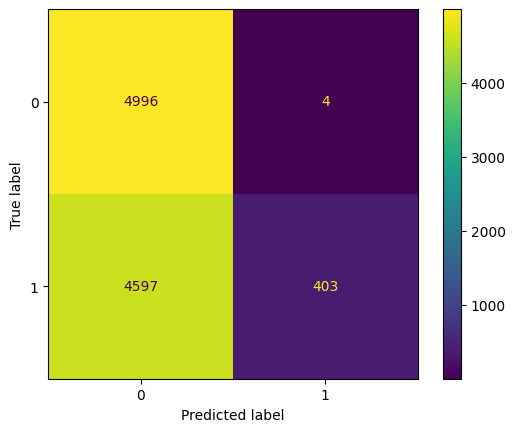

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = vit_classifier.predict(test_image_generator)

best_accuracy = 0
best_threshold = 0
best_report = ""

# Calculate ROC AUC directly
true_labels = test_image_generator.classes  # Get true labels once outside the loop
roc_auc = roc_auc_score(true_labels, predictions)  # Use roc_auc_score

for threshold in np.arange(0.1, 1.0, 0.1):
    predicted_labels = (predictions > threshold).astype(int)

    accuracy = accuracy_score(true_labels, predicted_labels)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_report = classification_report(true_labels, predicted_labels)
        cm = confusion_matrix(true_labels, predicted_labels)

print(f"Best Accuracy: {best_accuracy} at Threshold: {best_threshold}")
print(f"ROC AUC: {roc_auc}")  # Print ROC AUC
print("Best Classification Report:\n", best_report)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

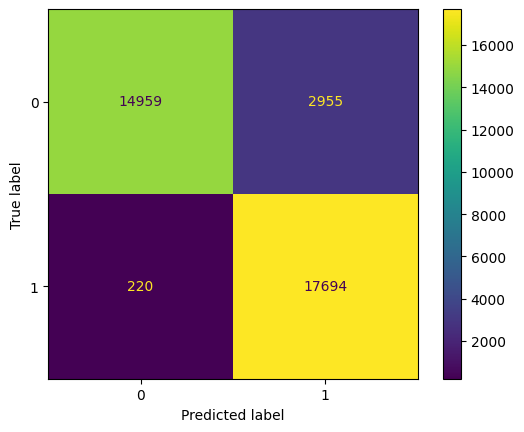

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [80]:

#inception
from keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(input_shape=(75,75,3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras import layers

x = layers.Flatten()(inception.output)
#x = layers.Dense(128, activation='relu')(x)
#x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inception.input, x)


In [ ]:
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers, regularizers, models
from tensorflow.keras.optimizers import Adam # We'll use Adam for compilation

# --- 1. Model Configuration Parameters ---
L2_PENALTY = 0.001  # Strength of the L2 regularization (0.001 is a common starting point)
DROPOUT_RATE = 0.4  # Percentage of neurons to drop (40%)

# --- 2. Load and Configure the Base Model (InceptionV3) ---
inception = InceptionV3(
    input_shape=(100,100, 3), 
    weights='imagenet', 
    include_top=False # Important: Exclude the original classification head
)

# CRITICAL for transfer learning: Freeze the base layers
for layer in inception.layers:
    layer.trainable = False

# --- 3. Build the Regularized Classification Head ---

# Start the head by flattening the output of the InceptionV3 base
x = layers.Flatten()(inception.output)

# 1. ADD L2 REGULARIZED HIDDEN DENSE LAYER
# This layer has L2 regularization applied to its weights (kernel)
x = layers.Dense(
    256, # Example number of units, you can adjust this
    activation='relu',
    kernel_regularizer=regularizers.l2(L2_PENALTY),
    name='l2_regularized_hidden_dense'
)(x)

# 2. ADD DROPOUT LAYER
# This layer randomly sets 40% of the inputs to 0 during training
x = layers.Dropout(DROPOUT_RATE, name='dropout_layer')(x)

# 3. Final Sigmoid Layer for Binary Classification
x = layers.Dense(1, activation='sigmoid', name='output_layer')(x)

# --- 4. Assemble and Compile the Model ---
model = models.Model(inception.input, x)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4), # Use a low learning rate for safety, though only the head is training
    loss='binary_crossentropy',         # Appropriate loss for a single-node sigmoid output
    metrics=['accuracy']
)

model.summary()


In [ ]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, UpSampling2D, Conv2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

model = Sequential()
# add the pretrained model
model.add(ResNet50(include_top=False, pooling='max', weights='imagenet', input_shape=(32,32,3)))
# add fully connected layer with output
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# set resnet layers not trainable
model.layers[0].trainable=False

#model.build(input_shape=(None, 32,32, 3))
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
"""
from keras.applications.vgg16 import VGG16

# Form the correct input shape for the model in case the `TARGET_SIZE`
# is not square (e.g. (224, 224)).
INPUT_SHAPE = (100,100, 3)

base_model = VGG16(
    weights='imagenet',  # load weights pretrained on the ImageNet
    include_top=False,  # do not include the ImageNet classifier at the top
    input_shape=INPUT_SHAPE,
    pooling='max'  # add a global max pooling layer after the base model
)

base_model.summary()
import keras
from keras.layers import Dropout, Dense

# Freeze the base model so that only the new top layers are trained.
base_model.trainable = False

num_classes = 1

model = keras.Sequential([
    base_model,
    #Dropout(0.2),
    #Dense(128, activation='relu'),
    # Dense(128, activation='relu'),
    #Dropout(0.2),
    Dense(num_classes, activation='sigmoid')
])

model.summary()
"""

"\nfrom keras.applications.vgg16 import VGG16\n\n# Form the correct input shape for the model in case the `TARGET_SIZE`\n# is not square (e.g. (224, 224)).\nINPUT_SHAPE = (100,100, 3)\n\nbase_model = VGG16(\n    weights='imagenet',  # load weights pretrained on the ImageNet\n    include_top=False,  # do not include the ImageNet classifier at the top\n    input_shape=INPUT_SHAPE,\n    pooling='max'  # add a global max pooling layer after the base model\n)\n\nbase_model.summary()\nimport keras\nfrom keras.layers import Dropout, Dense\n\n# Freeze the base model so that only the new top layers are trained.\nbase_model.trainable = False\n\nnum_classes = 1\n\nmodel = keras.Sequential([\n    base_model,\n    #Dropout(0.2),\n    #Dense(128, activation='relu'),\n    # Dense(128, activation='relu'),\n    #Dropout(0.2),\n    Dense(num_classes, activation='sigmoid')\n])\n\nmodel.summary()\n"

In [81]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, mode="min", verbose=1, min_lr=0.001)
call_backs = [ early_stopping, lr_reduce]

In [ ]:
checkpoint_filepath = '/content/rtiotdosddos2_12_24.weights.h5'

In [82]:
import keras
checkpoint_filepath = 'c:/users/lenovo/rtiotdosddos2_12_24.weights.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
call_back = [ early_stopping, lr_reduce, model_checkpoint_callback ]

from datetime import datetime
start_time = datetime.now()

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
"""
batch_size=32
STEP_SIZE_TRAIN = len(train_image_generator) // batch_size
#STEP_SIZE_TRAIN=train_image_generator.n//train_image_generator.batch_size
STEP_SIZE_VALID=len(val_image_generator) // batch_size
STEP_SIZE_TEST=test_image_generator.n//test_image_generator.batch_size
"""
history=model.fit(train_image_generator,
                    #steps_per_epoch=128,
                    validation_data=val_image_generator,
                    #validation_steps=128,
                    epochs=10,
                  callbacks=call_back
)
#Train the model
#history=model.fit(train_image_generator,epochs=100,  callbacks=call_backs)

end_time = datetime.now()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Training time: {elapsed_time}")
# Evaluate the model


Epoch 1/10


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


502/502 ━━━━━━━━━━━━━━━━━━━━ 422s 782ms/step - accuracy: 0.9238 - loss: 0.2097 - val_accuracy: 0.9730 - val_loss: 0.0965 - learning_rate: 0.0010
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 252s 500ms/step - accuracy: 0.9752 - loss: 0.0875 - val_accuracy: 0.9755 - val_loss: 0.0825 - learning_rate: 0.0010
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 236s 469ms/step - accuracy: 0.9800 - loss: 0.0729 - val_accuracy: 0.9768 - val_loss: 0.0767 - learning_rate: 0.0010
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 187s 372ms/step - accuracy: 0.9801 - loss: 0.0652 - val_accuracy: 0.9770 - val_loss: 0.0722 - learning_rate: 0.0010
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 195s 387ms/step - accuracy: 0.9795 - loss: 0.0651 - val_accuracy: 0.9765 - val_loss: 0.0705 - learning_rate: 0.0010
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 191s 381ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.9770 - val_loss: 0.0676 - learning_rate: 0.0010
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 199s 397ms/step - accuracy: 0.9814 

In [83]:
import pyarrow
file_path = "C:/Users/lenovo/Downloads/UNSW_NB15_training-set.parquet"
test=pd.read_parquet(file_path, engine='pyarrow')

In [84]:
# Select rows where 'attack_cat' is 'DoS' or 'Normal'
selected_rows = test[test['attack_cat'].isin(['Shellcode', 'Normal'])]

# Display the first few rows of the selected data
display(selected_rows.head())

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0


In [85]:
import numpy as np
selected_rows = selected_rows.copy() # Create a copy to avoid SettingWithCopyWarning
selected_rows.replace([np.inf, -np.inf], np.nan, inplace=True)
selected_rows=selected_rows.dropna()

selected_rows.drop(['attack_cat'], axis=1, inplace=True)

In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (including 'category' dtype)
categorical_cols = selected_rows.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    selected_rows[col] = le.fit_transform(selected_rows[col])

In [87]:
feat=['sjit','djit','synack', 'ackdat','smean','dmean','proto', 'sbytes','dbytes','rate','service']


In [36]:
#with zeroes
feat=['sjit','djit','synack', 'ackdat','smean','dmean',
      'blank','blank','blank','proto','sjit','djit' ,
      'smean','dmean','sbytes','dbytes','blank','blank',
      'rate','sjit','djit','blank','blank','blank',
      'dur','blank','blank','blank','blank','blank',
      'blank','blank','blank','blank','blank','service']
# Create a new DataFrame with 36 columns named numerically
new_df = pd.DataFrame()

# Add 36 columns with numerical names (0 to 35) and initialize them with 0
for i in range(36):
  for col_name in feat:
    if col_name != 'blank':
        # If the column name is not 'blank', get the data from the original DataFrame
        new_df[i] = selected_rows[col_name]
    else:
            # Handle the case where the feature is not in selected_rows (though it should be based on the context)
        new_df[i] = 0
    
# Display the first few rows of the new DataFrame


In [88]:
y_test=selected_rows['label']
# Convert categorical labels to numerical using LabelEncoder

#y_train=y_train.astype(float)

X_test=selected_rows[feat]
#X_train=train.drop('attack', axis=1)


In [89]:
from imblearn.over_sampling import SMOTE
def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)

    return X_balanced, y_balanced
(X_test,y_test)=balance_dataset(X_test, y_test)

In [90]:


os.chdir("C:/Users/lenovo/")
# Check if the directory exists, if not create it
if not os.path.exists("download2"):
    os.makedirs("download2")

# Change the current working directory
os.chdir("download2")


# Convert the mitmds array to uint8
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test.iloc[i]==0:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Normal.{i}.jpg',"JPEG")



In [91]:


os.chdir("C:/Users/lenovo/")
# Check if the directory exists, if not create it
if not os.path.exists("download2"):
    os.makedirs("download2")

# Change the current working directory
os.chdir("download2")


# Convert the mitmds array to uint8
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test.iloc[i]==1:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

    # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")



In [92]:
test_img_dir_n = "C:/Users/lenovo/download2"
#train_img_dir_n =train_img_dir_n [:1000]
test_img_paths_n = [os.path.join(test_img_dir_n,filename) for filename in os.listdir(test_img_dir_n)]

In [93]:
import re

test_path_df = pd.DataFrame({
    'path': [],
    'target': []
})

for path in test_img_paths_n:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [94]:
test_path_df['target'] = test_path_df['target'].astype(str)

In [95]:
test_image_generator = datagen.flow_from_dataframe(
    test_path_df,
    x_col='path',
    y_col='target',
    target_size=(75,75),  # Adjust to match your model's input size
    #batch_size=32,
    class_mode='binary',  # Change to 'binary' if you have binary classes
    shuffle=False,
    color_mode='rgb'
)

Found 112000 validated image filenames belonging to 2 classes.


In [73]:
X_test.shape

(112000, 36)

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1780s 507ms/step
Best Accuracy: 0.49744642857142857 at Threshold: 0.9
ROC AUC: 0.4907521463647959
Best Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.99      0.66     56000
           1       0.27      0.00      0.01     56000

    accuracy                           0.50    112000
   macro avg       0.38      0.50      0.33    112000
weighted avg       0.38      0.50      0.33    112000



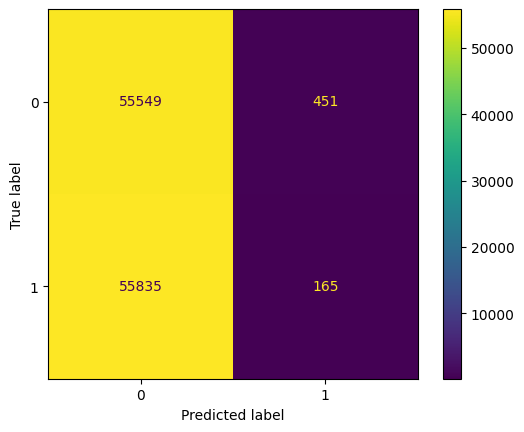

In [96]:

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#checkpoint_filepath = 'c:/users/lenovo/rtiotdosddos2_12_24.weights.h5'
#model.load_weights(checkpoint_filepath)
predictions = model.predict(test_image_generator)

best_accuracy = 0
best_threshold = 0
best_report = ""

# Calculate ROC AUC directly
true_labels = test_image_generator.classes  # Get true labels once outside the loop
roc_auc = roc_auc_score(true_labels, predictions)  # Use roc_auc_score

for threshold in np.arange(0.1, 1.0, 0.1):
    predicted_labels = (predictions > threshold).astype(int)

    accuracy = accuracy_score(true_labels, predicted_labels)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_report = classification_report(true_labels, predicted_labels)
        cm = confusion_matrix(true_labels, predicted_labels)

print(f"Best Accuracy: {best_accuracy} at Threshold: {best_threshold}")
print(f"ROC AUC: {roc_auc}")  # Print ROC AUC
print("Best Classification Report:\n", best_report)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 1885s 539ms/step


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Best Accuracy: 0.5 at Threshold: 0.1
ROC AUC: 0.674
Best Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     56000
           1       0.00      0.00      0.00     56000

    accuracy                           0.50    112000
   macro avg       0.25      0.50      0.33    112000
weighted avg       0.25      0.50      0.33    112000



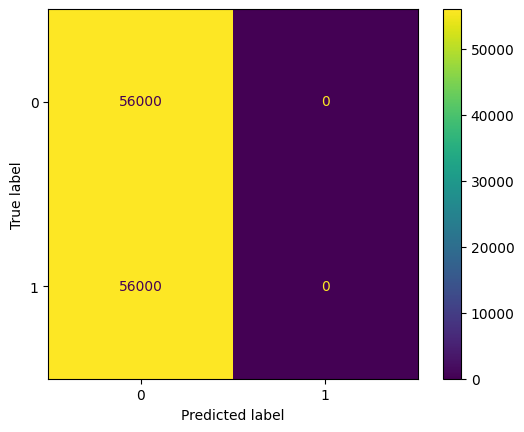

In [52]:
"""
#with zeros
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#checkpoint_filepath = 'c:/users/lenovo/rtiotdosddos2_12_24.weights.h5'
model.load_weights(checkpoint_filepath)
predictions = model.predict(test_image_generator)

best_accuracy = 0
best_threshold = 0
best_report = ""

# Calculate ROC AUC directly
true_labels = test_image_generator.classes  # Get true labels once outside the loop
roc_auc = roc_auc_score(true_labels, predictions)  # Use roc_auc_score

for threshold in np.arange(0.1, 1.0, 0.1):
    predicted_labels = (predictions > threshold).astype(int)

    accuracy = accuracy_score(true_labels, predicted_labels)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_report = classification_report(true_labels, predicted_labels)
        cm = confusion_matrix(true_labels, predicted_labels)

print(f"Best Accuracy: {best_accuracy} at Threshold: {best_threshold}")
print(f"ROC AUC: {roc_auc}")  # Print ROC AUC
print("Best Classification Report:\n", best_report)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

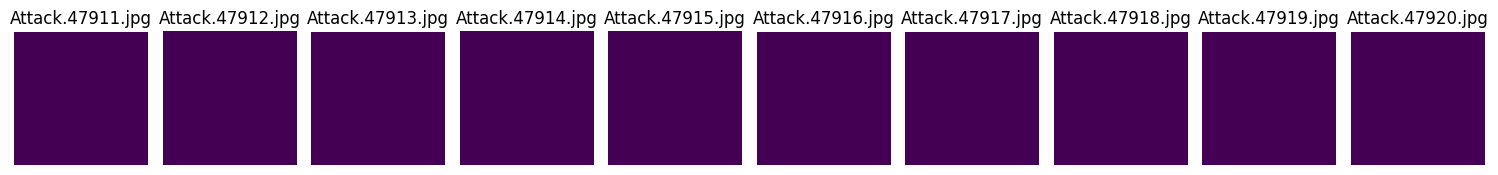

In [44]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_first_10_images(folder_path):
    """Displays the first 10 image files found in a folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in {folder_path}")
        return

    # Sort the image files to ensure consistent order (optional)
    image_files.sort()

    # Display the first 10 images
    num_images_to_display = min(10, len(image_files))
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    # Handle the case of a single image
    if num_images_to_display == 1:
        axes = [axes]

    for i in range(num_images_to_display):
        image_path = os.path.join(folder_path, image_files[i])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(image_files[i])
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image {image_files[i]}: {e}")
            axes[i].set_title("Error")
            axes[i].axis('off')


    plt.tight_layout()
    plt.show()

# Specify the folder path
folder_path = 'c:/users/lenovo/download2/' # Replace with the path to your image folder

# Display the images
display_first_10_images(folder_path)

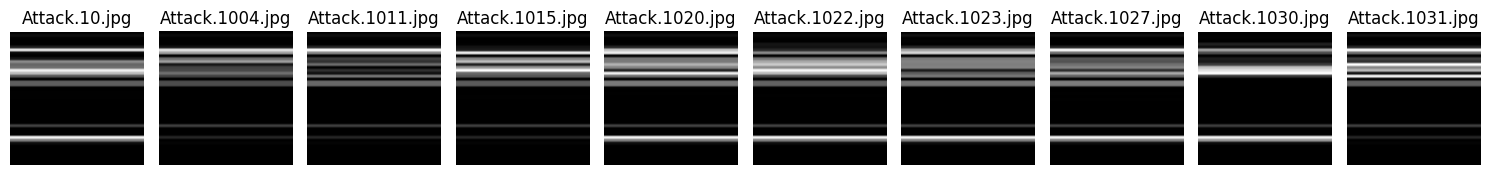

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_first_10_images(folder_path):
    """Displays the first 10 image files found in a folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in {folder_path}")
        return

    # Sort the image files to ensure consistent order (optional)
    image_files.sort()

    # Display the first 10 images
    num_images_to_display = min(10, len(image_files))
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    # Handle the case of a single image
    if num_images_to_display == 1:
        axes = [axes]

    for i in range(num_images_to_display):
        image_path = os.path.join(folder_path, image_files[i])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(image_files[i])
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image {image_files[i]}: {e}")
            axes[i].set_title("Error")
            axes[i].axis('off')


    plt.tight_layout()
    plt.show()

# Specify the folder path
folder_path = '/content/download1/' # Replace with the path to your image folder

# Display the images
display_first_10_images(folder_path)

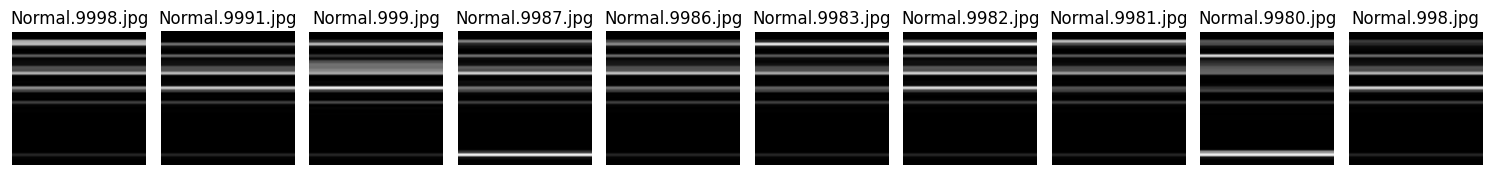

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_last_10_images(folder_path):
    """Displays the last 10 image files found in a folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in {folder_path}")
        return

    # Sort the image files in reverse order
    image_files.sort(reverse=True)

    # Display the last 10 images (which are the first 10 after reverse sorting)
    num_images_to_display = min(10, len(image_files))
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    # Handle the case of a single image
    if num_images_to_display == 1:
        axes = [axes]

    for i in range(num_images_to_display):
        image_path = os.path.join(folder_path, image_files[i])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(image_files[i])
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image {image_files[i]}: {e}")
            axes[i].set_title("Error")
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Specify the folder path
folder_path = '/content/download1/'  # Replace with the path to your image folder

# Display the images
display_last_10_images(folder_path)

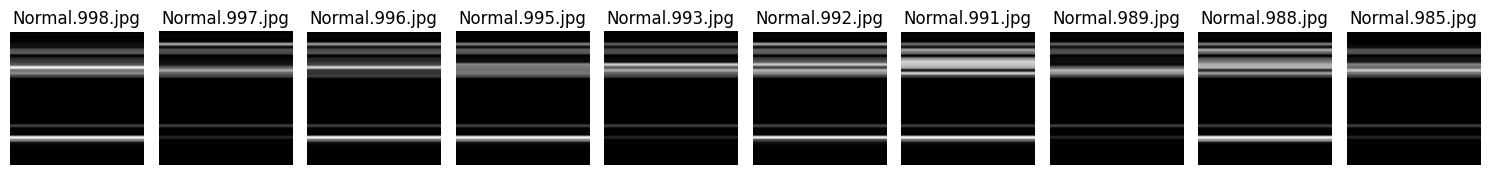

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_last_10_images(folder_path):
    """Displays the last 10 image files found in a folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in {folder_path}")
        return

    # Sort the image files in reverse order
    image_files.sort(reverse=True)

    # Display the last 10 images (which are the first 10 after reverse sorting)
    num_images_to_display = min(10, len(image_files))
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    # Handle the case of a single image
    if num_images_to_display == 1:
        axes = [axes]

    for i in range(num_images_to_display):
        image_path = os.path.join(folder_path, image_files[i])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(image_files[i])
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image {image_files[i]}: {e}")
            axes[i].set_title("Error")
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Specify the folder path
folder_path = '/content/download1/'  # Replace with the path to your image folder

# Display the images
display_last_10_images(folder_path)

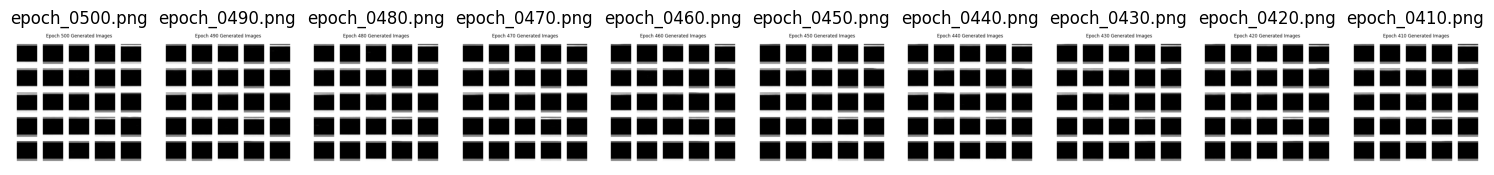

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_last_10_images(folder_path):
    """Displays the last 10 image files found in a folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in {folder_path}")
        return

    # Sort the image files in reverse order
    image_files.sort(reverse=True)

    # Display the last 10 images (which are the first 10 after reverse sorting)
    num_images_to_display = min(10, len(image_files))
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    # Handle the case of a single image
    if num_images_to_display == 1:
        axes = [axes]

    for i in range(num_images_to_display):
        image_path = os.path.join(folder_path, image_files[i])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(image_files[i])
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image {image_files[i]}: {e}")
            axes[i].set_title("Error")
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Specify the folder path
folder_path = '/home/studio-lab-user/generated_images/'  # Replace with the path to your image folder

# Display the images
display_last_10_images(folder_path)

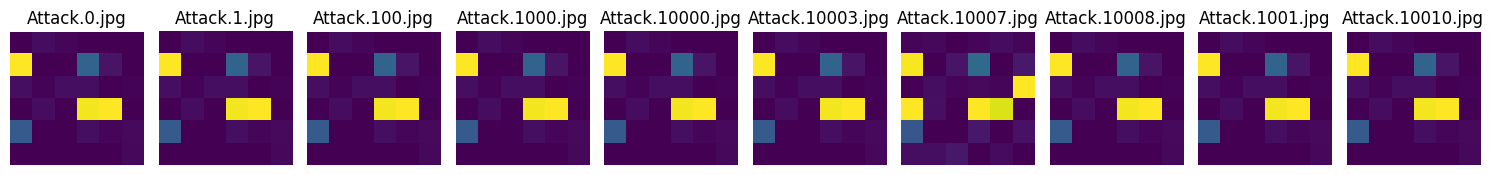

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_first_10_images(folder_path):
    """Displays the first 10 image files found in a folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in {folder_path}")
        return

    # Sort the image files to ensure consistent order (optional)
    image_files.sort()

    # Display the first 10 images
    num_images_to_display = min(10, len(image_files))
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    # Handle the case of a single image
    if num_images_to_display == 1:
        axes = [axes]

    for i in range(num_images_to_display):
        image_path = os.path.join(folder_path, image_files[i])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(image_files[i])
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image {image_files[i]}: {e}")
            axes[i].set_title("Error")
            axes[i].axis('off')


    plt.tight_layout()
    plt.show()

# Specify the folder path
folder_path = '/content/download1/' # Replace with the path to your image folder

# Display the images
display_first_10_images(folder_path)

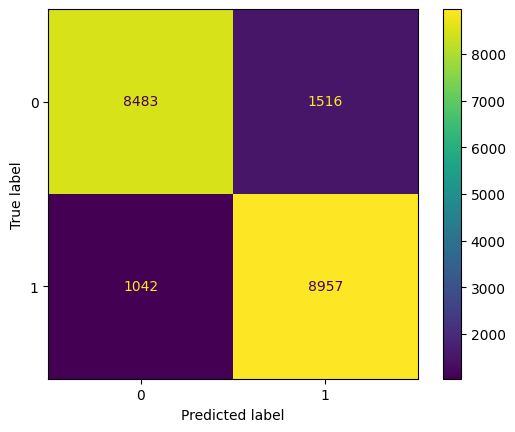

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [55]:
import shutil

# Replace 'directory_path' with the actual path of the directory you want to delete
directory_path = "C:/Users/lenovo/download1"
# Delete the directory and its contents
shutil.rmtree(directory_path)
"""
directory_path = '/content/download1'

# Delete the directory and its contents
shutil.rmtree(directory_path)
directory_path = '/content/download1val'

# Delete the directory and its contents
shutil.rmtree(directory_path)
"""

"\ndirectory_path = '/content/download1'\n\n# Delete the directory and its contents\nshutil.rmtree(directory_path)\ndirectory_path = '/content/download1val'\n\n# Delete the directory and its contents\nshutil.rmtree(directory_path)\n"

In [ ]:
test=pd.read_csv("/content/test2.csv", skipinitialspace=True, low_memory=False, nrows=100)

In [ ]:
import numpy as np
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test=test.dropna()
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = test.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])


In [ ]:
y_test=test['attack']
# Convert categorical labels to numerical using LabelEncoder

#y_train=y_train.astype(float)

X_test=test[top_features]

In [ ]:
from imblearn.over_sampling import SMOTE
def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)

    return X_balanced, y_balanced
(X_test,y_test)=balance_dataset(X_test, y_test)

In [ ]:
#test2
os.chdir("/content/")

In [ ]:
#test1
X_test = pd.DataFrame(X_test)

In [ ]:
#test1
import numpy as np
import tensorflow as tf
from PIL import Image
import os
import csv

labels = ["Normal", "MITM"]
os.chdir("/content/")
# Check if the directory exists, if not create it
if not os.path.exists("download2"):
    os.makedirs("download2")

# Change the current working directory
os.chdir("download2")


# Convert the mitmds array to uint8
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test[i]==0:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Normal.{i}.jpg',"JPEG")


In [ ]:
#test1
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test[i]==1:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size,image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")


In [ ]:
test_img_dir_n = "/content/download2"
#train_img_dir_n =train_img_dir_n [:1000]
test_img_paths_n = [os.path.join(test_img_dir_n,filename) for filename in os.listdir(test_img_dir_n)]

In [ ]:
import re

test_path_df = pd.DataFrame({
    'path': [],
    'target': []
})

for path in test_img_paths_n:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [ ]:
test_path_df['target'] = test_path_df['target'].astype(str)

In [ ]:
test_image_generator = datagen.flow_from_dataframe(
    test_path_df,
    x_col='path',
    y_col='target',
    target_size=(100,100),  # Adjust to match your model's input size
    #batch_size=32,
    class_mode='binary',  # Change to 'binary' if you have binary classes
    shuffle=False,
    color_mode='rgb'
)

Found 19998 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 540ms/step
Best Accuracy: 0.7647264726472647 at Threshold: 0.1
ROC AUC: 0.8601228959779668
Best Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      9999
           1       0.78      0.74      0.76      9999

    accuracy                           0.76     19998
   macro avg       0.77      0.76      0.76     19998
weighted avg       0.77      0.76      0.76     19998



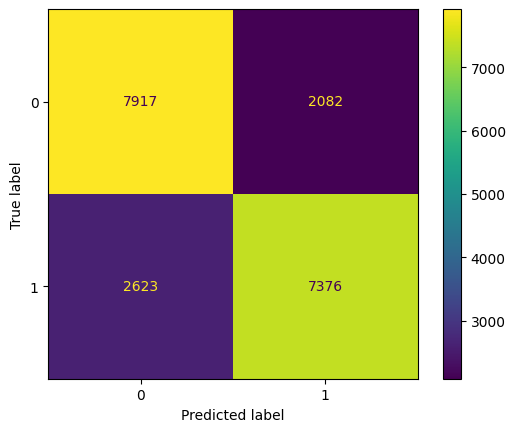

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.load_weights(checkpoint_filepath)
predictions = model.predict(test_image_generator)

best_accuracy = 0
best_threshold = 0
best_report = ""

# Calculate ROC AUC directly
true_labels = test_image_generator.classes  # Get true labels once outside the loop
roc_auc = roc_auc_score(true_labels, predictions)  # Use roc_auc_score

for threshold in np.arange(0.1, 1.0, 0.1):
    predicted_labels = (predictions > threshold).astype(int)

    accuracy = accuracy_score(true_labels, predicted_labels)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_report = classification_report(true_labels, predicted_labels)
        cm = confusion_matrix(true_labels, predicted_labels)

print(f"Best Accuracy: {best_accuracy} at Threshold: {best_threshold}")
print(f"ROC AUC: {roc_auc}")  # Print ROC AUC
print("Best Classification Report:\n", best_report)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

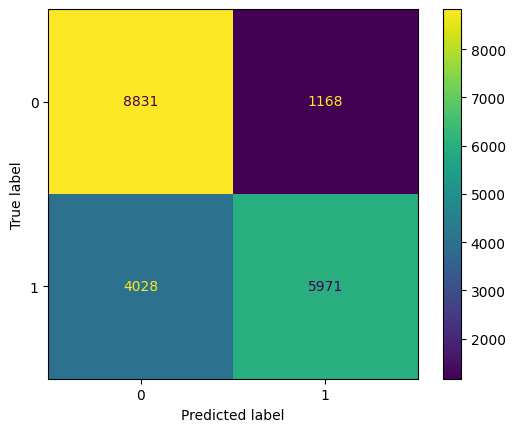

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [22]:
import shutil
directory_path = '/content/download1'

# Delete the directory and its contents
shutil.rmtree(directory_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/download1'

In [ ]:
test=pd.read_csv("/content/RT_IOT2022recon_norm.csv", skipinitialspace=True, low_memory=False, nrows=100)

FileNotFoundError: [Errno 2] No such file or directory: '/content/RT_IOT2022recon_norm.csv'

In [ ]:
import numpy as np
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test=test.dropna()
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = test.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])


In [ ]:
y_test=test['Attack_Type']
# Convert categorical labels to numerical using LabelEncoder

#y_train=y_train.astype(float)

X_test=test[top_features]

In [ ]:
from imblearn.over_sampling import SMOTE
def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)

    return X_balanced, y_balanced
(X_test,y_test)=balance_dataset(X_test, y_test)

In [ ]:
#test2
os.chdir("/content/")

In [ ]:
#test1
X_test = pd.DataFrame(X_test)

In [ ]:
#test1
import numpy as np
import tensorflow as tf
from PIL import Image
import os
import csv

labels = ["Normal", "MITM"]
os.chdir("/content/")
# Check if the directory exists, if not create it
if not os.path.exists("download2"):
    os.makedirs("download2")

# Change the current working directory
os.chdir("download2")


# Convert the mitmds array to uint8
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test[i]==0:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size, image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Normal.{i}.jpg',"JPEG")


In [ ]:
#test1
X_test = X_test.astype(np.uint8)

# Iterate over each element in the mitmds array
for i in range(X_test.shape[0]):
    if y_test[i]==1:
        binary_values = np.unpackbits(X_test.iloc[i].values.view(np.uint8))

        # Group the bits into 8-bit chunks
        grouped_values = np.packbits(binary_values.reshape(-1, 8))

    # Determine the dimensions of the image (assuming a square image)
        image_size = int(np.ceil(np.sqrt(len(grouped_values))))

    # Pad the grouped values with zeros to make a square image
        padded_values = np.pad(grouped_values, (0, image_size**2 - len(grouped_values)), 'constant')

    # Reshape the padded values into a 2D image array
        image_data = padded_values.reshape(image_size,image_size)

    # Create an image from the array and save it
        image = Image.fromarray(image_data, mode='L')
        image.save(f'Attack.{i}.jpg',"JPEG")


In [ ]:
test_img_dir_n = "/content/download2"
#train_img_dir_n =train_img_dir_n [:1000]
test_img_paths_n = [os.path.join(test_img_dir_n,filename) for filename in os.listdir(test_img_dir_n)]

In [ ]:
import re

test_path_df = pd.DataFrame({
    'path': [],
    'target': []
})

for path in test_img_paths_n:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [ ]:
test_path_df['target'] = test_path_df['target'].astype(str)

In [ ]:
test_image_generator = datagen.flow_from_dataframe(
    test_path_df,
    x_col='path',
    y_col='target',
    target_size=(100,100),  # Adjust to match your model's input size
    #batch_size=32,
    class_mode='binary',  # Change to 'binary' if you have binary classes
    shuffle=False,
    color_mode='rgb'
)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

model.load_weights(checkpoint_filepath)
predictions = model.predict(test_image_generator)

best_accuracy = 0
best_threshold = 0
best_report = ""

# Calculate ROC AUC directly
true_labels = test_image_generator.classes  # Get true labels once outside the loop
roc_auc = roc_auc_score(true_labels, predictions)  # Use roc_auc_score

for threshold in np.arange(0.1, 1.0, 0.1):
    predicted_labels = (predictions > threshold).astype(int)

    accuracy = accuracy_score(true_labels, predicted_labels)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_report = classification_report(true_labels, predicted_labels)

print(f"Best Accuracy: {best_accuracy} at Threshold: {best_threshold}")
print(f"ROC AUC: {roc_auc}")  # Print ROC AUC
print("Best Classification Report:\n", best_report)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
import shutil
directory_path = '/content/download2'

# Delete the directory and its contents
shutil.rmtree(directory_path)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - kl_loss: 52.3660 - loss: 845.8538 - reconstruction_loss: 793.4879
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - kl_loss: 2.3710 - loss: 439.9126 - reconstruction_loss: 437.5415
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - kl_loss: 2.0665 - loss: 429.6872 - reconstruction_loss: 427.6207
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - kl_loss: 1.9434 - loss: 423.4704 - reconstruction_loss: 421.5270
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - kl_loss: 1.8061 - loss: 423.1236 - reconstruction_loss: 421.3176
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - kl_loss: 1.6785 - loss: 419.4695 - reconstruction_loss: 417.7910
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - kl_loss: 1.5980 - loss: 419.9543 - reconstruction_loss: 418.3563
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - kl_loss: 1.5162 - loss: 418.5097 - reconstruction_loss: 416.9935
Epoch 9/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 19

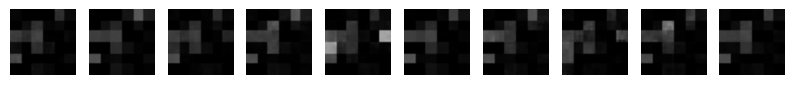

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have your ImageDataGenerator setup
# train_image_generator = ... # Your ImageDataGenerator for training data

# 1. Define the VAE model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            # Use MeanSquaredError or BinaryCrossentropy depending on your output activation
            # For images scaled between 0 and 1 with 'sigmoid' output, BinaryCrossentropy is common
            # If you are using 'relu' or similar and not scaling, you might prefer MSE.
            # For this example with sigmoid and likely scaled images, BinaryCrossentropy.
            # Ensure the data dtype matches the reconstruction dtype (usually float32)
            data = tf.cast(data, reconstruction.dtype)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            # Scale the reconstruction loss by the number of pixels per image
            reconstruction_loss *= tf.cast(tf.reduce_prod(tf.shape(data)[1:]), tf.float32)
            kl_loss = -0.5 * tf.reduce_mean(
                z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# 2. Define the Encoder model
def build_encoder(latent_dim, input_shape):
    encoder_inputs = keras.Input(shape=input_shape)
    # Add convolutional and pooling layers. Stride of 2 reduces dimensions.
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x) # Added another layer for 28x28
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x) # Increased dense units
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    # Reparameterization trick
    z = layers.Lambda(
        lambda t: t[0] + tf.exp(0.5 * t[1]) * tf.random.normal(shape=tf.shape(t[0])),
        name="z"
    )([z_mean, z_log_var])
    return keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, z], name="encoder")

# 3. Define the Decoder model
def build_decoder(latent_dim, output_shape):
    decoder_inputs = keras.Input(shape=(latent_dim,))
    # Calculate the flattened size based on the encoder's architecture.
    # Input shape (28, 28, 3). Three Conv2D layers with stride 2.
    # Spatial dimensions after 3 layers: 28 -> 14 -> 7 -> 4
    # Using padding="same" might result in ceil(dim/stride).
    # 28/2 = 14, 14/2 = 7, 7/2 = ceil(3.5) = 4.
    # If the last Conv2DTranspose outputs 128 filters, the size before flattening was (4, 4, 128).
    dense_layer_size = (output_shape[0] // 8) * (output_shape[1] // 8) * 128 # Assuming 3 strides of 2 and 128 filters
    x = layers.Dense(dense_layer_size, activation="relu")(decoder_inputs)
    # Reshape to the spatial dimensions before the first Conv2DTranspose
    x = layers.Reshape((output_shape[0] // 8, output_shape[1] // 8, 128))(x) # Reshape to (4, 4, 128)
    x = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same")(x) # Output (8, 8, 128)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)  # Output (16, 16, 64)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)  # Output (32, 32, 32) - might need adjustment
    # The final Conv2DTranspose should output an image with the original number of channels (3 for RGB)
    # Need to adjust the last Conv2DTranspose stride and kernel to get back to 28x28
    # From 4x4 to 28x28 is complex with standard Conv2DTranspose strides of 2.
    # Let's simplify the encoder to make the decoder easier.
    # Two Conv2D layers with stride 2: 28 -> 14 -> 7. Before flatten: (7, 7, 64).
    # Decoder starts with (7, 7, 64). Two Conv2DTranspose with stride 2: 7 -> 14 -> 28.
    # Let's revert the encoder to two Conv2D layers with stride 2 and 64 filters in the last layer.
    # And decoder to two Conv2DTranspose layers with stride 2.

    # Simplified Decoder based on a simpler encoder
    dense_layer_size_simplified = (output_shape[0] // 4) * (output_shape[1] // 4) * 64 # Assuming 2 strides of 2 and 64 filters
    x = layers.Dense(dense_layer_size_simplified, activation="relu")(decoder_inputs)
    x = layers.Reshape((output_shape[0] // 4, output_shape[1] // 4, 64))(x) # Reshape to (7, 7, 64)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x) # Output (14, 14, 64)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x) # Output (28, 28, 32)
    decoder_outputs = layers.Conv2DTranspose(output_shape[-1], 3, activation="sigmoid", padding="same")(x) # Output (28, 28, 3)
    return keras.Model(inputs=decoder_inputs, outputs=decoder_outputs, name="decoder")


# 4. Instantiate, compile, and train the VAE using the image generator
latent_dim = 10  # You can adjust the latent dimension
# Get the actual input shape from the generator
input_shape = train_image_generator.target_size + (train_image_generator.image_shape[-1],)
output_shape = input_shape # Assuming input and output shapes are the same

# Rebuild the encoder with two Conv2D layers as assumed in the simplified decoder
def build_encoder_simplified(latent_dim, input_shape):
    encoder_inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs) # Output (14, 14, 32)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x) # Output (7, 7, 64)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = layers.Lambda(
        lambda t: t[0] + tf.exp(0.5 * t[1]) * tf.random.normal(shape=tf.shape(t[0])),
        name="z"
    )([z_mean, z_log_var])
    return keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, z], name="encoder")

encoder = build_encoder_simplified(latent_dim, input_shape)
decoder = build_decoder(latent_dim, output_shape) # Use the simplified decoder logic
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# Train the VAE using the image generator
# Use the number of batches as steps_per_epoch
vae.fit(train_image_generator1, epochs=50, steps_per_epoch=len(train_image_generator1)) # Increased epochs

# 5. Generate new patterns:
# Generate new patterns by sampling from the latent space
n_samples = 100
random_latent_vectors = tf.random.normal(shape=(n_samples, latent_dim))
generated_images = vae.decoder(random_latent_vectors)

# Display the generated images
plt.figure(figsize=(10, 2))
for i in range(n_samples):
    ax = plt.subplot(1, n_samples, i + 1)
    # Adjust imshow based on the number of channels in your images (grayscale or RGB)
    if generated_images.shape[-1] == 1:
        plt.imshow(generated_images[i].numpy().squeeze(), cmap="gray")
    else:
        # Clip values to be in the valid range [0, 1] for visualization
        plt.imshow(np.clip(generated_images[i].numpy(), 0, 1))
    plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have your ImageDataGenerator setup
# train_image_generator = ... # Your ImageDataGenerator for training data

# 1. Define the VAE model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            # Use MeanSquaredError or BinaryCrossentropy depending on your output activation
            # For images scaled between 0 and 1 with 'sigmoid' output, BinaryCrossentropy is common
            # If you are using 'relu' or similar and not scaling, you might prefer MSE.
            # For this example with sigmoid and likely scaled images, BinaryCrossentropy.
            # Ensure the data dtype matches the reconstruction dtype (usually float32)
            data = tf.cast(data, reconstruction.dtype)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            # Scale the reconstruction loss by the number of pixels per image
            reconstruction_loss *= tf.cast(tf.reduce_prod(tf.shape(data)[1:]), tf.float32)
            kl_loss = -0.5 * tf.reduce_mean(
                z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# 2. Define the Encoder model
def build_encoder(latent_dim, input_shape):
    encoder_inputs = keras.Input(shape=input_shape)
    # Add convolutional and pooling layers. Stride of 2 reduces dimensions.
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x) # Added another layer for 28x28
    x = layers.Conv2D(256, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x) # Increased dense units
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    # Reparameterization trick
    z = layers.Lambda(
        lambda t: t[0] + tf.exp(0.5 * t[1]) * tf.random.normal(shape=tf.shape(t[0])),
        name="z"
    )([z_mean, z_log_var])
    return keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, z], name="encoder")

# 3. Define the Decoder model
def build_decoder(latent_dim, output_shape):
    decoder_inputs = keras.Input(shape=(latent_dim,))
    # Calculate the flattened size based on the encoder's architecture.
    # Input shape (28, 28, 3). Three Conv2D layers with stride 2.
    # Spatial dimensions after 3 layers: 28 -> 14 -> 7 -> 4
    # Using padding="same" might result in ceil(dim/stride).
    # 28/2 = 14, 14/2 = 7, 7/2 = ceil(3.5) = 4.
    # If the last Conv2DTranspose outputs 128 filters, the size before flattening was (4, 4, 128).
    dense_layer_size = (output_shape[0] // 8) * (output_shape[1] // 8) * 128 # Assuming 3 strides of 2 and 128 filters
    x = layers.Dense(dense_layer_size, activation="relu")(decoder_inputs)
    # Reshape to the spatial dimensions before the first Conv2DTranspose
    x = layers.Reshape((output_shape[0] // 8, output_shape[1] // 8, 128))(x) # Reshape to (4, 4, 128)
    x = layers.Conv2DTranspose(256, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same")(x) # Output (8, 8, 128)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)  # Output (16, 16, 64)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)  # Output (32, 32, 32) - might need adjustment
    # The final Conv2DTranspose should output an image with the original number of channels (3 for RGB)
    # Need to adjust the last Conv2DTranspose stride and kernel to get back to 28x28
    # From 4x4 to 28x28 is complex with standard Conv2DTranspose strides of 2.
    # Let's simplify the encoder to make the decoder easier.
    # Two Conv2D layers with stride 2: 28 -> 14 -> 7. Before flatten: (7, 7, 64).
    # Decoder starts with (7, 7, 64). Two Conv2DTranspose with stride 2: 7 -> 14 -> 28.
    # Let's revert the encoder to two Conv2D layers with stride 2 and 64 filters in the last layer.
    # And decoder to two Conv2DTranspose layers with stride 2.

    # Simplified Decoder based on a simpler encoder
    dense_layer_size_simplified = (output_shape[0] // 4) * (output_shape[1] // 4) * 64 # Assuming 2 strides of 2 and 64 filters
    x = layers.Dense(dense_layer_size_simplified, activation="relu")(decoder_inputs)
    x = layers.Reshape((output_shape[0] // 4, output_shape[1] // 4, 64))(x) # Reshape to (7, 7, 64)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x) # Output (14, 14, 64)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x) # Output (28, 28, 32)
    decoder_outputs = layers.Conv2DTranspose(output_shape[-1], 3, activation="sigmoid", padding="same")(x) # Output (28, 28, 3)
    return keras.Model(inputs=decoder_inputs, outputs=decoder_outputs, name="decoder")


# 4. Instantiate, compile, and train the VAE using the image generator
latent_dim = 200  # You can adjust the latent dimension
# Get the actual input shape from the generator
input_shape = train_image_generator.target_size + (train_image_generator.image_shape[-1],)
output_shape = input_shape # Assuming input and output shapes are the same
"""
# Rebuild the encoder with two Conv2D layers as assumed in the simplified decoder
def build_encoder_simplified(latent_dim, input_shape):
    encoder_inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation="LeakyReLU", strides=2, padding="same")(encoder_inputs) # Output (14, 14, 32)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x) # Output (7, 7, 64)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = layers.Lambda(
        lambda t: t[0] + tf.exp(0.5 * t[1]) * tf.random.normal(shape=tf.shape(t[0])),
        name="z"
    )([z_mean, z_log_var])
    return keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, z], name="encoder")
"""
encoder = build_encoder(latent_dim, input_shape)
decoder = build_decoder(latent_dim, output_shape) # Use the simplified decoder logic
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# Train the VAE using the image generator
# Use the number of batches as steps_per_epoch
vae.fit(train_image_generator1, epochs=50, steps_per_epoch=len(train_image_generator1))
n_samples = 100
random_latent_vectors = tf.random.normal(shape=(n_samples, latent_dim))
generated_images = vae.decoder(random_latent_vectors)

# 1. Save the generated images
output_dir = "/content/generated_images"  # Define the output directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

generated_image_paths = []
for i in range(n_samples):
    # Convert tensor to numpy array and scale to 0-255 if needed
    img_array = (generated_images[i].numpy() * 255).astype(np.uint8)

    # Adjust based on image channels
    if img_array.shape[-1] == 1:
        img = Image.fromarray(img_array.squeeze(), mode='L') # Grayscale
    else:
        img = Image.fromarray(img_array, mode='RGB') # RGB

    img_path = os.path.join(output_dir, f"Attack_{i}.jpg")
    img.save(img_path, "JPEG")
    generated_image_paths.append(img_path)

print(f"Saved {n_samples} generated images to {output_dir}")


Epoch 1/50


In [ ]:
test_img_dir_n = "/content/generated_images/"
#train_img_dir_n =train_img_dir_n [:1000]
test_img_paths_n = [os.path.join(test_img_dir_n,filename) for filename in os.listdir(test_img_dir_n)]

In [ ]:
import re

test_path_df = pd.DataFrame({
    'path': [],
    'target': []
})

for path in test_img_paths_n:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [ ]:
test_path_df['target'] = test_path_df['target'].astype(str)

In [ ]:
test_image_generator = datagen.flow_from_dataframe(
    test_path_df,
    x_col='path',
    y_col='target',
    target_size=(100,100),  # Adjust to match your model's input size
    #batch_size=32,
    class_mode=None,  # Change to 'binary' if you have binary classes
    shuffle=False,
    color_mode='rgb'
)

Found 100 validated image filenames.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from datetime import datetime

#model.load_weights(checkpoint_filepath)

# Get the number of samples in the test generator
num_test_samples = test_image_generator.n
batch_size = test_image_generator.batch_size

print("Predicting and measuring time per prediction...")

total_inference_time = 0
all_predictions = []

# Reset the generator to ensure predictions start from the beginning
test_image_generator.reset()

# Iterate through the test generator batch by batch
for i in range(len(test_image_generator)):
    start_time = datetime.now()
    # Get the next batch of images (and optionally labels, though we only need images for prediction)
    # Use test_image_generator[i] to get the i-th batch
    # If class_mode is None, it yields only images
    # If class_mode is 'binary' or 'categorical', it yields (images, labels)
    batch_data = test_image_generator[i]

    # Extract images from the batch data
    if isinstance(batch_data, tuple):
        batch_images = batch_data[0]
    else:
        batch_images = batch_data


    batch_predictions = vit_classifier.predict(batch_images, verbose=0) # Set verbose to 0 to avoid per-batch progress output
    end_time = datetime.now()

    elapsed_time = end_time - start_time
    total_inference_time += elapsed_time.total_seconds()

    all_predictions.append(batch_predictions)

    # Calculate time per prediction for this batch
    num_predictions_in_batch = batch_images.shape[0]
    if num_predictions_in_batch > 0:
        time_per_prediction_batch = elapsed_time.total_seconds() / num_predictions_in_batch
        print(f"Batch {i+1}/{len(test_image_generator)}: Time per prediction: {time_per_prediction_batch:.6f} seconds")


# Concatenate predictions from all batches
predictions = np.concatenate(all_predictions, axis=0)

# Calculate overall time per prediction
if num_test_samples > 0:
    overall_time_per_prediction = total_inference_time / num_test_samples
    print(f"\nOverall average time per prediction: {overall_time_per_prediction:.6f} seconds")
else:
    print("\nNo samples found in the test generator.")


predicted_labels = (predictions > 0.5).astype(int)
#true_labels = test_image_generator.classes # You might need to get true labels separately if class_mode is None

print("\nPredicted Labels (first 10):")
# Print only the first 10 predicted labels
for i in range(min(10, len(predicted_labels))):
    print(predicted_labels[i])


"""
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)
roc_auc = roc_auc_score(true_labels, predictions)

print(f"ROC AUC: {roc_auc}")
"""

4/4 [==============================] - 2s 146ms/step
Predicted Labels: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


'\naccuracy = accuracy_score(true_labels, predicted_labels)\nprint("Accuracy:", accuracy)\n\nreport = classification_report(true_labels, predicted_labels)\nprint("Classification Report:\n", report)\nroc_auc = roc_auc_score(true_labels, predictions)\n\nprint(f"ROC AUC: {roc_auc}")\n'

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from datetime import datetime
import numpy as np

#model.load_weights(checkpoint_filepath)

# Get the number of samples in the test generator
num_test_samples = test_image_generator.n
batch_size = test_image_generator.batch_size

print("Predicting and measuring time per prediction...")

total_inference_time = 0
all_predictions = []

# Reset the generator to ensure predictions start from the beginning
test_image_generator.reset()

# Iterate through the test generator batch by batch
for i in range(len(test_image_generator)):
    start_time = datetime.now()
    # Get the next batch of images (and optionally labels, though we only need images for prediction)
    # Use test_image_generator[i] to get the i-th batch
    # If class_mode is None, it yields only images
    # If class_mode is 'binary' or 'categorical', it yields (images, labels)
    batch_data = test_image_generator[i]

    # Extract images from the batch data
    if isinstance(batch_data, tuple):
        batch_images = batch_data[0]
    else:
        batch_images = batch_data


    batch_predictions = model.predict(batch_images, verbose=0) # Set verbose to 0 to avoid per-batch progress output
    end_time = datetime.now()

    elapsed_time = end_time - start_time
    total_inference_time += elapsed_time.total_seconds()

    all_predictions.append(batch_predictions)

    # Calculate time per prediction for this batch
    num_predictions_in_batch = batch_images.shape[0]
    if num_predictions_in_batch > 0:
        time_per_prediction_batch = elapsed_time.total_seconds() / num_predictions_in_batch
        print(f"Batch {i+1}/{len(test_image_generator)}: Time per prediction: {time_per_prediction_batch:.6f} seconds")


# Concatenate predictions from all batches
predictions = np.concatenate(all_predictions, axis=0)

# Calculate overall time per prediction
if num_test_samples > 0:
    overall_time_per_prediction = total_inference_time / num_test_samples
    print(f"\nOverall average time per prediction: {overall_time_per_prediction:.6f} seconds")
else:
    print("\nNo samples found in the test generator.")


predicted_labels = (predictions > 0.5).astype(int)
#true_labels = test_image_generator.classes # You might need to get true labels separately if class_mode is None

print("\nPredicted Labels (first 10):")
# Print only the first 10 predicted labels
for i in range(min(10, len(predicted_labels))):
    print(predicted_labels[i])


"""
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)
roc_auc = roc_auc_score(true_labels, predictions)

print(f"ROC AUC: {roc_auc}")
"""

1/1 [==============================] - 3s 3s/step
Predicted Labels: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


'\naccuracy = accuracy_score(true_labels, predicted_labels)\nprint("Accuracy:", accuracy)\n\nreport = classification_report(true_labels, predicted_labels)\nprint("Classification Report:\n", report)\nroc_auc = roc_auc_score(true_labels, predictions)\n\nprint(f"ROC AUC: {roc_auc}")\n'

In [ ]:
train_img_dir_n1 = "/content/downloadpatA"
#train_img_dir_n =train_img_dir_n [:1000]
train_img_paths_n1 = [os.path.join(train_img_dir_n1,filename) for filename in os.listdir(train_img_dir_n1)]

In [ ]:
import re

train_path_df1 = pd.DataFrame({
    'path': [],
    'target': []
})

for path in train_img_paths_n1:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        train_path_df1 = pd.concat([train_path_df1, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        train_path_df1 = pd.concat([train_path_df1, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [ ]:
train_path_df1['target'] = train_path_df1['target'].astype(str)

In [ ]:
train_image_generator1 = datagen.flow_from_dataframe(
    train_path_df1,
    x_col='path',
    y_col='target',
    target_size=(100,100),  # Adjust to match your model's input size
   # batch_size=32,
    class_mode=None,  # Change to 'binary' if you have binary classes
    shuffle=True,
    color_mode='rgb',
    #subset='training'
)

Found 8019 validated image filenames.


In [ ]:
vae.fit(train_image_generator1, epochs=10, steps_per_epoch=len(train_image_generator1))
n_samples = 100
random_latent_vectors = tf.random.normal(shape=(n_samples, latent_dim))
generated_images = vae.decoder(random_latent_vectors)

# 1. Save the generated images
output_dir = "/content/generated_imagesN"  # Define the output directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

generated_image_paths = []
for i in range(n_samples):
    # Convert tensor to numpy array and scale to 0-255 if needed
    img_array = (generated_images[i].numpy() * 255).astype(np.uint8)

    # Adjust based on image channels
    if img_array.shape[-1] == 1:
        img = Image.fromarray(img_array.squeeze(), mode='L') # Grayscale
    else:
        img = Image.fromarray(img_array, mode='RGB') # RGB

    img_path = os.path.join(output_dir, f"Normal_{i}.jpg")
    img.save(img_path, "JPEG")
    generated_image_paths.append(img_path)

print(f"Saved {n_samples} generated images to {output_dir}")


Epoch 1/10
251/251 [==============================] - 272s 1s/step - loss: 5228.8959 - reconstruction_loss: 5219.1758 - kl_loss: 3.9734
Epoch 2/10
251/251 [==============================] - 246s 979ms/step - loss: 5210.6892 - reconstruction_loss: 5212.7769 - kl_loss: 3.9110
Epoch 3/10
251/251 [==============================] - 319s 1s/step - loss: 5220.6389 - reconstruction_loss: 5210.2563 - kl_loss: 3.8474
Epoch 4/10
251/251 [==============================] - 262s 1s/step - loss: 5215.7329 - reconstruction_loss: 5208.0508 - kl_loss: 3.8071
Epoch 5/10
251/251 [==============================] - 261s 1s/step - loss: 5209.2642 - reconstruction_loss: 5206.7505 - kl_loss: 3.7690
Epoch 6/10
251/251 [==============================] - 261s 1s/step - loss: 5207.2387 - reconstruction_loss: 5205.9160 - kl_loss: 3.7363
Epoch 7/10
251/251 [==============================] - 264s 1s/step - loss: 5200.6116 - reconstruction_loss: 5205.4619 - kl_loss: 3.6849
Epoch 8/10
251/251 [=========================

In [ ]:
test_img_dir_n = "/content/generated_imagesN/"
#train_img_dir_n =train_img_dir_n [:1000]
test_img_paths_n = [os.path.join(test_img_dir_n,filename) for filename in os.listdir(test_img_dir_n)]

In [ ]:
import re

test_path_df = pd.DataFrame({
    'path': [],
    'target': []
})

for path in test_img_paths_n:
    pattern = r'Normal'

    match = re.search(pattern, path)

    if match:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [0]})], ignore_index=True)
    else:
        test_path_df = pd.concat([test_path_df, pd.DataFrame({'path': [path], 'target': [1]})], ignore_index=True)

In [ ]:
test_path_df['target'] = test_path_df['target'].astype(str)

In [ ]:
test_image_generator = datagen.flow_from_dataframe(
    test_path_df,
    x_col='path',
    y_col='target',
    target_size=(100,100),  # Adjust to match your model's input size
    #batch_size=32,
    class_mode=None,  # Change to 'binary' if you have binary classes
    shuffle=False,
    color_mode='rgb'
)

Found 100 validated image filenames.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
#model.load_weights(checkpoint_filepath)
#predictions = model.predict(test_image_generator)
predicted_labels = (predictions > 0.2).astype(int)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]


In [19]:
#RUN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Conv2DTranspose, BatchNormalization, Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Configuration ---
EPOCHS = 500
LATENT_DIM = 100
ADAM_LEARNING_RATE = 0.0002
ADAM_BETA_1 = 0.5
IMG_HEIGHT = 32
IMG_WIDTH = 32
CHANNELS = 1 # Set to 3 for RGB images, 1 for grayscale
BATCH_SIZE = 128
IMAGE_FOLDER = 'download1' # Ensure this path is correct and contains images

# --- 0. Setup: Create a dummy dataset directory for demonstration ---
# In a real scenario, you would have your actual image dataset here.
# This creates a 'dummy_dataset' directory with dummy images if IMAGE_FOLDER is empty or doesn't exist.
if not os.path.exists(IMAGE_FOLDER):
    os.makedirs(IMAGE_FOLDER)
    print(f"Created dummy image folder at '{IMAGE_FOLDER}'")

    # Create some dummy grayscale images (32x32 pixels)
    num_dummy_images = 200 # Need enough for at least one batch
    for i in range(num_dummy_images):
        dummy_img_data = np.random.randint(0, 256, size=(IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
        dummy_img = Image.fromarray(dummy_img_data, mode='L') # 'L' for grayscale
        dummy_img.save(os.path.join(IMAGE_FOLDER, f'dummy_gray_image_{i:03d}.png'))
    print(f"Created {num_dummy_images} dummy grayscale images at '{IMAGE_FOLDER}'")

# --- 1. Define the Generator Model ---
def build_generator(latent_dim):
    model = Sequential(name="Generator")

    # Start with 8x8 spatial dimensions, project latent dim to 8*8*256 features
    model.add(Dense(8 * 8 * 256, use_bias=False, input_shape=(latent_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    # Reshape to 8x8 feature maps with 256 channels
    model.add(Reshape((8, 8, 256)))

    # Upsample to 16x16
    model.add(Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    # Upsample to 32x32 (IMG_HEIGHT x IMG_WIDTH)
    model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    # Output layer with the correct number of channels (1 for grayscale, 3 for RGB)
    # and 'tanh' activation to output pixel values in [-1, 1]
    model.add(Conv2D(CHANNELS, (3, 3), padding='same', activation='tanh'))

    return model

# --- 2. Define the Discriminator Model ---
def build_discriminator(img_height, img_width, channels):
    model = Sequential(name="Discriminator")

    # Input layer matching image dimensions
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=[img_height, img_width, channels]))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    # If your image size is larger than 32x32, you might need more Conv2D layers here
    # For 32x32 input:
    # 32x32 -> 16x16 (stride 2)
    # 16x16 -> 8x8 (stride 2)
    # This is fine for Flattening.

    model.add(Flatten())
    # Output 1 neuron with no activation for WGAN, or sigmoid for original GAN
    # Your loss functions use `from_logits=False` so `sigmoid` is needed here.
    model.add(Dense(1, activation='sigmoid'))

    return model

# --- 3. Define Loss Functions and Optimizers ---
# BinaryCrossentropy with from_logits=False means the model's last layer should have a sigmoid activation.
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    # Discriminator wants to classify real images as 1 and fake images as 0
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    # Generator wants discriminator to classify fake images as 1 (i.e., fool the discriminator)
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers for Generator and Discriminator
generator_optimizer = Adam(learning_rate=ADAM_LEARNING_RATE, beta_1=ADAM_BETA_1)
discriminator_optimizer = Adam(learning_rate=ADAM_LEARNING_RATE, beta_1=ADAM_BETA_1)

# --- Initialize models ---
generator = build_generator(LATENT_DIM)
discriminator = build_discriminator(IMG_HEIGHT, IMG_WIDTH, CHANNELS)

# Print model summaries to verify architecture and shapes
print("--- Generator Summary ---")
generator.summary()
print("\n--- Discriminator Summary ---")
discriminator.summary()

# --- 4. Define the Training Step ---
@tf.function # Compiles the function into a TensorFlow graph for faster execution
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True) # Generate images

        real_output = discriminator(images, training=True) # Discriminator on real images
        fake_output = discriminator(generated_images, training=True) # Discriminator on fake images

        gen_loss = generator_loss(fake_output) # Calculate generator loss
        disc_loss = discriminator_loss(real_output, fake_output) # Calculate discriminator loss

    # Calculate gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Apply gradients to update weights
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# --- Image Generation and Saving Function ---
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    # Rescale images from [-1, 1] (tanh output) to [0, 1] for display/saving
    predictions = (predictions + 1) / 2.0

    save_dir = 'C:/Users/lenovo/generated_images'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Create a single figure with subplots
    fig = plt.figure(figsize=(5, 5)) # Adjust figure size as needed for 25 images (5x5 grid)

    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i+1) # 5x5 grid for 25 images
        if CHANNELS == 1:
            # Squeeze the channel dimension for grayscale display
            plt.imshow(predictions[i, :, :, 0], cmap='gray')
        else: # RGB
            plt.imshow(predictions[i, :, :, :])
        plt.axis('off')

    plt.suptitle(f'Epoch {epoch} Generated Images')
    plt.tight_layout()
    filename = os.path.join(save_dir, f'epoch_{epoch:04d}.png')
    plt.savefig(filename)
    plt.close(fig) # Close the figure to free up memory

    print(f'Saved {predictions.shape[0]} sample images for epoch {epoch} to {filename}')


# --- 5. Training Loop ---
def train(dataset, epochs):
    generator_losses = []
    discriminator_losses = []
    # Fixed noise for consistent visualization of generator's progress
    seed = tf.random.normal([25, LATENT_DIM]) # Generate 25 sample images (5x5 grid)

    for epoch in range(epochs):
        epoch_gen_loss_avg = tf.keras.metrics.Mean()
        epoch_disc_loss_avg = tf.keras.metrics.Mean()

        # Iterate through the tf.data.Dataset
        for image_batch in dataset:
            # Ensure images are normalized to [-1, 1] to match generator's tanh output
            # load_and_preprocess_image already does this: image = (image * 2.0) - 1.0
            gen_loss, disc_loss = train_step(image_batch)
            epoch_gen_loss_avg.update_state(gen_loss)
            epoch_disc_loss_avg.update_state(disc_loss)

        generator_losses.append(epoch_gen_loss_avg.result().numpy())
        discriminator_losses.append(epoch_disc_loss_avg.result().numpy())

        # Print progress
        print(f'Epoch {epoch+1}/{epochs} completed. Gen Loss: {generator_losses[-1]:.4f}, Disc Loss: {discriminator_losses[-1]:.4f}')

        # Generate and save sample images periodically
        if (epoch + 1) % 10 == 0 or epoch == 0: # Save every 10 epochs and at epoch 0
            generate_and_save_images(generator, epoch + 1, seed)

    # After training, plot the losses
    plot_losses(generator_losses, discriminator_losses)

# --- Plotting Function ---
def plot_losses(gen_losses, disc_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.title('GAN Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Function to load and preprocess images ---
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    # Ensure channels=CHANNELS is used (1 for grayscale, 3 for RGB)
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    # Normalize image to [-1, 1] range to match generator's tanh output
    image = (image * 2.0) - 1.0
    return image

# --- Get the list of image file paths ---
image_files = [os.path.join(IMAGE_FOLDER, f) for f in os.listdir(IMAGE_FOLDER) if os.path.isfile(os.path.join(IMAGE_FOLDER, f))]
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    raise FileNotFoundError(f"No image files found in '{IMAGE_FOLDER}'. Please ensure images are present or the path is correct.")

# --- Create a tf.data.Dataset ---
dataset = tf.data.Dataset.from_tensor_slices(image_files)
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.shuffle(buffer_size=len(image_files))
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True) # drop_remainder=True for fixed batch size
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Ensure output directory for generated images exists
if not os.path.exists('C:/Users/lenovo/generated_images'):
    os.makedirs('C:/Users/lenovo/generated_images')

# --- Start Training ---
print("\nStarting GAN training...")
train(dataset, EPOCHS)



C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


--- Generator Summary ---


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16384)               │       1,638,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16384)               │          65,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         294,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 64)          │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,073,921 (7.91 MB)

 Trainable params: 2,040,769 (7.78 MB)

 Non-trainable params: 33,152 (129.50 KB)


--- Discriminator Summary ---


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,689 (323.00 KB)

 Trainable params: 82,689 (323.00 KB)

 Non-trainable params: 0 (0.00 B)


Starting GAN training...
Epoch 1/500 completed. Gen Loss: 0.6316, Disc Loss: 1.3356
Saved 25 sample images for epoch 1 to C:/Users/lenovo/generated_images\epoch_0001.png
Epoch 2/500 completed. Gen Loss: 0.7209, Disc Loss: 1.3223
Epoch 3/500 completed. Gen Loss: 0.7299, Disc Loss: 1.3130
Epoch 4/500 completed. Gen Loss: 0.7461, Disc Loss: 1.2939
Epoch 5/500 completed. Gen Loss: 0.7556, Disc Loss: 1.2816
Epoch 6/500 completed. Gen Loss: 0.7592, Disc Loss: 1.2753
Epoch 7/500 completed. Gen Loss: 0.7650, Disc Loss: 1.2728
Epoch 8/500 completed. Gen Loss: 0.7676, Disc Loss: 1.2714
Epoch 9/500 completed. Gen Loss: 0.7685, Disc Loss: 1.2658
Epoch 10/500 completed. Gen Loss: 0.7696, Disc Loss: 1.2773
Saved 25 sample images for epoch 10 to C:/Users/lenovo/generated_images\epoch_0010.png
Epoch 11/500 completed. Gen Loss: 0.7659, Disc Loss: 1.2719
Epoch 12/500 completed. Gen Loss: 0.7660, Disc Loss: 1.2780
Epoch 13/500 completed. Gen Loss: 0.7666, Disc Loss: 1.2737
Epoch 14/500 completed. Gen Lo

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd # Included as it was in your original snippet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Conv2DTranspose, BatchNormalization, Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers # Included as it was in your original snippet

# --- Configuration ---
EPOCHS = 500 # Increased epochs, GANs typically need more training for higher resolutions
LATENT_DIM = 100
IMG_HEIGHT = 100 # Changed to 100
IMG_WIDTH = 100  # Changed to 100
CHANNELS = 3     # Changed to 3 for RGB images
BATCH_SIZE = 32  # Keep batch size reasonable, often 32 or 64 for higher resolutions
IMAGE_FOLDER = '/root/sruthick/download2/' # Ensure this path contains your RGB images
save_dir = '/root/sruthick/generated_imagescol1'
os.chdir("/root/sruthick/")

# --- Build the Generator ---
def build_generator(latent_dim):
    model = Sequential(name="Generator")

    # Initial Dense layer to create features for the first spatial dimension
    # For 100x100 output with two 2x upsampling steps, we start at 25x25
    model.add(Dense(25 * 25 * 256, use_bias=False, input_shape=(latent_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU()) # Added alpha for LeakyReLU consistency

    # Reshape to 25x25 feature maps
    model.add(Reshape((25, 25, 256))) # Changed initial spatial dim to 25x25

    # Upsample to 50x50
    # Kernel size 4, stride 2 is common for checkerboard mitigation in 2x upsampling
    model.add(Conv2DTranspose(128, (5,5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    # Upsample to 100x100
    model.add(Conv2DTranspose(64, (5,5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
 model.add(Conv2D(CHANNELS, (5,5), padding='same', activation='tanh')) # Changed kernel size to 4x4

    return model

# --- Build the Discriminator ---
def build_discriminator(img_height, img_width, channels):
    model = Sequential(name="Discriminator")

    # Downsample from 100x100 to 50x50
    model.add(Conv2D(64, (5,5), strides=(2, 2), padding='same', input_shape=[img_height, img_width, channels])) # Changed kernel size to 4x4
    model.add(LeakyReLU())
    model.add(Dropout(0.3)) # Increased dropout slightly for better generalization

    # Downsample from 50x50 to 25x25
    model.add(Conv2D(128, (5,5), strides=(2, 2), padding='same')) # Changed kernel size to 4x4
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1)) # Output 1 for real, 0 for fake

    return model

# --- Loss Functions and Optimizers ---
# Assuming you intend to use Wasserstein loss based on your previous discussions
# If you want to use standard BCE, uncomment the cross_entropy definition and use it.
# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_wasserstein_loss(real_output, fake_output):
    # For WGAN, Critic tries to maximize D(real) - D(fake)
    # So, loss is fake_output_mean - real_output_mean
    return tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

def generator_wasserstein_loss(fake_output):
    # For WGAN, Generator tries to maximize D(fake) (make fake look real)
    # So, loss is -D(fake)_mean
    return -tf.reduce_mean(fake_output)

GENERATOR_LEARNING_RATE = 0.00002 # Common starting point for GANs
DISCRIMINATOR_LEARNING_RATE = 0.00002 # Keep learning rates balanced initially
ADAM_BETA_1 = 0.5 # Common value for Adam in GANs
ADAM_BETA_2 = 0.999 # Default value, usually fine
generator_optimizer = Adam(
    learning_rate=GENERATOR_LEARNING_RATE,
    beta_1=ADAM_BETA_1,
    beta_2=ADAM_BETA_2,
    epsilon=ADAM_EPSILON
)

discriminator_optimizer = Adam(
    learning_rate=DISCRIMINATOR_LEARNING_RATE,
    beta_1=ADAM_BETA_1,
    beta_2=ADAM_BETA_2,
    epsilon=ADAM_EPSILON
)

# --- Create Models ---
generator = build_generator(LATENT_DIM)
discriminator = build_discriminator(IMG_HEIGHT, IMG_WIDTH, CHANNELS)

# --- Training Step ---
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # Use Wasserstein losses as defined
        gen_loss = generator_wasserstein_loss(fake_output)
        disc_loss = discriminator_wasserstein_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss
def train(dataset, epochs):
    generator_losses = []
    discriminator_losses = []

    # Fixed noise for visualizing progress
    seed = tf.random.normal([25, LATENT_DIM]) # Use a fixed seed for consistent visualization

    for epoch in range(epochs):
        epoch_gen_loss_avg = tf.keras.metrics.Mean()
        epoch_disc_loss_avg = tf.keras.metrics.Mean()

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            epoch_gen_loss_avg.update_state(gen_loss)
            epoch_disc_loss_avg.update_state(disc_loss)

        # Store the average loss for the epoch
        generator_losses.append(epoch_gen_loss_avg.result().numpy())
        discriminator_losses.append(epoch_disc_loss_avg.result().numpy())

        # Print progress
        print(f'Epoch {epoch+1}/{epochs} completed. Gen Loss: {generator_losses[-1]:.4f}, Disc Loss: {discriminator_losses[-1]:.4f}')

        # Generate and save images periodically (e.g., every 10 epochs or more frequently for debugging)
        if (epoch + 1) % 10 == 0: # Save images less frequently to save space
            generate_and_save_images(generator, epoch + 1, seed) # Use the fixed seed

    # After training, plot the losses
    plot_losses(generator_losses, discriminator_losses)

# --- Plotting Function ---
def plot_losses(gen_losses, disc_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.title('GAN Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions = (predictions + 1) / 2.0  # Rescale images to [0, 1] for saving

    # Define the directory to save individual images
    # Create a subdirectory for each epoch's images for better organization
    current_save_dir = os.path.join(save_dir, f'epoch_{epoch:04d}')
    if not os.path.exists(current_save_dir):
        os.makedirs(current_save_dir)

    # Iterate through each generated image in the batch
    for i in range(predictions.shape[0]):
        # Adjust for 3 channels: if CHANNELS is 3, imshow expects (H, W, 3)
        # If CHANNELS is 1, it expects (H, W)
        individual_image = predictions[i, :, :, :] if CHANNELS == 3 else predictions[i, :, :, 0]

        fig, ax = plt.subplots(figsize=(1, 1)) # Small figsize for individual image
        ax.imshow(individual_image, cmap='gray' if CHANNELS == 1 else None) # Use cmap='gray' only for grayscale
        ax.axis('off') # Hide axes

        filename = os.path.join(current_save_dir, f'image_{i:03d}.png')
        plt.savefig(filename, bbox_inches='tight', pad_inches=0) # Use bbox_inches and pad_inches to remove whitespace
        plt.close(fig) # Close the figure to free up memory

    print(f'Saved {predictions.shape[0]} individual images for epoch {epoch:04d} to {current_save_dir}')


# --- Load and Prepare Dataset using tf.data ---
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    # Ensure channels=CHANNELS is used for decode_jpeg
    image = tf.image.decode_jpeg(image, channels=CHANNELS) # Decode with specified channels
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = (image * 2.0) - 1.0 # Normalize to [-1, 1] for tanh output
    return image

# Get the list of image file paths
image_files = [os.path.join(IMAGE_FOLDER, f) for f in os.listdir(IMAGE_FOLDER) if os.path.isfile(os.path.join(IMAGE_FOLDER, f))]
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Create a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices(image_files)
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.shuffle(buffer_size=len(image_files))
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# --- Train the GAN ---
train(dataset, EPOCHS)


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your train_image_generator already defined and loaded

# 1. Define the Generator Model
def build_generator(latent_dim):
    model = keras.Sequential()
    model.add(layers.Dense(7*7*128, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 128)))
    # Make sure the output shape of the generator eventually matches your image size
    # You'll need to adjust Conv2DTranspose layers accordingly.
    # Example for 100x100x3 images:
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Adjust the final Conv2DTranspose to get to your target size (100x100)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your train_image_generator already defined and loaded

# 1. Define the Generator Model
def build_generator(latent_dim):
    model = keras.Sequential()
    model.add(layers.Dense(7*7*128, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 128)))
    # Make sure the output shape of the generator eventually matches your image size
    # You'll need to adjust Conv2DTranspose layers accordingly.
    # Example for 100x100x3 images:
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Adjust the final Conv2DTranspose to get to your target size (100x100)
    # This may require some trial and error with strides and padding.
    # The number of filters should be 3 for RGB or 1 for grayscale.
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')) # Adjust strides and padding

    # Make sure the final output shape is (None, 100, 100, 3) or (None, 100, 100, 1)
    # depending on your color mode.

    return model

# 2. Define the Discriminator Model
def build_discriminator(img_shape):
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid')) # Binary classification: real (1) or fake (0)

    return model

# 3. Define Loss Functions and Optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# 4. Define the Training Step
@tf.function
def train_step(images):
    latent_dim = 100 # Adjust as needed
    noise = tf.random.normal([images.shape[0], latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# 5. Training Loop
def train_gan(dataset, epochs):
    for epoch in range(epochs):
        # Iterate through the image generator to get real image batches
        for image_batch, _ in dataset: # Assuming your generator yields (images, labels)
            train_step(image_batch)

        # You can add code here to generate and save sample images periodically
        # to visualize the progress of the generator.

# Initialize models
latent_dim = 100 # Adjust as needed
# Get the image shape from your generator
img_shape = train_image_generator.target_size + (train_image_generator.image_shape[-1],)

generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)

# Start training
epochs = 50 # Adjust as needed
train_gan(train_image_generator, epochs)

# 6. Generating New Patterns
# After training, you can generate new patterns using the trained generator:
# num_patterns_to_generate = 10
# noise = tf.random.normal([num_patterns_to_generate, latent_dim])
# generated_patterns = generator(noise, training=False)

# You can then save or display the generated_patterns.
    # depending on your color mode.

return model

# 2. Define the Discriminator Model
def build_discriminator(img_shape):
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid')) # Binary classification: real (1) or fake (0)

    return model

# 3. Define Loss Functions and Optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# 4. Define the Training Step
@tf.function
def train_step(images):
    latent_dim = 100 # Adjust as needed
    noise = tf.random.normal([images.shape[0], latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# 5. Training Loop
def train_gan(dataset, epochs):
    for epoch in range(epochs):
        # Iterate through the image generator to get real image batches
        for image_batch, _ in dataset: # Assuming your generator yields (images, labels)
            train_step(image_batch)

        # You can add code here to generate and save sample images periodically
        # to visualize the progress of the generator.

# Initialize models
latent_dim = 100 # Adjust as needed
# Get the image shape from your generator
img_shape = train_image_generator.target_size + (train_image_generator.image_shape[-1],)

generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)

# Start training
epochs = 50 # Adjust as needed
train_gan(train_image_generator, epochs)

# 6. Generating New Patterns
# After training, you can generate new patterns using the trained generator:
# num_patterns_to_generate = 10
# noise = tf.random.normal([num_patterns_to_generate, latent_dim])
# generated_patterns = generator(noise, training=False)

# You can then save or display the generated_patterns.

ValueError: in user code:

    File "/tmp/ipykernel_128/2860337898.py", line 107, in train_step  *
        fake_output = discriminator(generated_images, training=True)
    File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/keras/src/layers/input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling Sequential.call().
    
    [1mInput 0 of layer "conv2d_10" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (32, 28, 28, 3)[0m
    
    Arguments received by Sequential.call():
      • inputs=tf.Tensor(shape=(32, 28, 28, 3), dtype=float32)
      • training=True
      • mask=None


## import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from PIL import Image
import cv2

# Assuming your InceptionV3 model is already loaded into the 'model' variable

# Function to prepare the image
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image data if your model was trained on rescaled images (e.g., 0-1 range)
    img_array /= 255.0  # Adjust if your rescaling was different
    return img_array

# Function to implement CAM
def apply_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # Assuming binary classification with a single output node (sigmoid activation)
        # If your last layer has linear activation, you might need to adjust this
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
      heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

# Function to implement Grad-CAM
def apply_gradcam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # Assuming binary classification with a single output node (sigmoid activation)
        # If your last layer has linear activation, you might need to adjust this
        loss = predictions[:, 0]


    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    # Expand pooled_grads to match the spatial dimensions of conv_outputs
    pooled_grads = pooled_grads[tf.newaxis, tf.newaxis, tf.newaxis, :]
    heatmap = conv_outputs * pooled_grads

    # Sum across the channels to get a 2D heatmap
    heatmap = tf.reduce_sum(heatmap, axis=-1)
    heatmap = tf.squeeze(heatmap)


    heatmap = tf.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
        heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()


# Function to display the image with heatmap
def display_heatmap(heatmap, img_path, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    # Ensure heatmap is a numpy array before resizing
    heatmap = np.array(heatmap)

    # Resize heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)


    # Apply the heatmap to the original image
    viridis = plt.cm.get_cmap("viridis")
    viridis_colors = viridis(np.arange(256))[:, :3]
    heatmap_colored = viridis_colors[heatmap] * 255

    # Convert to PIL Image for blending
    heatmap_colored_img = Image.fromarray(heatmap_colored.astype(np.uint8))
    original_img = Image.fromarray(img.astype(np.uint8))

    # Blend the images
    superimposed_img = Image.blend(original_img, heatmap_colored_img, alpha=alpha)

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# --- How to use these functions with InceptionV3 ---

# 1. Specify the path to your image
image_path_to_visualize = '/content/download2/Normal.1000.jpg' # Replace with the actual path

# 2. Specify the target size that your InceptionV3 model expects
target_image_size = (100, 100) # InceptionV3 typically uses 299x299, but your model uses 100x100

# 3. Specify the name of the last convolutional layer in your InceptionV3 model
# A common last convolutional layer in InceptionV3 is 'mixed10'.
# You can confirm this by printing model.summary() after loading your model.
convolutional_layer_name = 'mixed10' # Adjust if your layer name is different


# 4. Preprocess the image
img_array = preprocess_image(image_path_to_visualize, target_image_size)

# 5. Generate and display CAM
print("Generating CAM...")
cam_heatmap = apply_cam(model, img_array, convolutional_layer_name)
print("Displaying CAM:")
display_heatmap(cam_heatmap, image_path_to_visualize)

# 6. Generate and display Grad-CAM
print("\nGenerating Grad-CAM...")
gradcam_heatmap = apply_gradcam(model, img_array, convolutional_layer_name)
print("Displaying Grad-CAM:")
display_heatmap(gradcam_heatmap, image_path_to_visualize)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(m

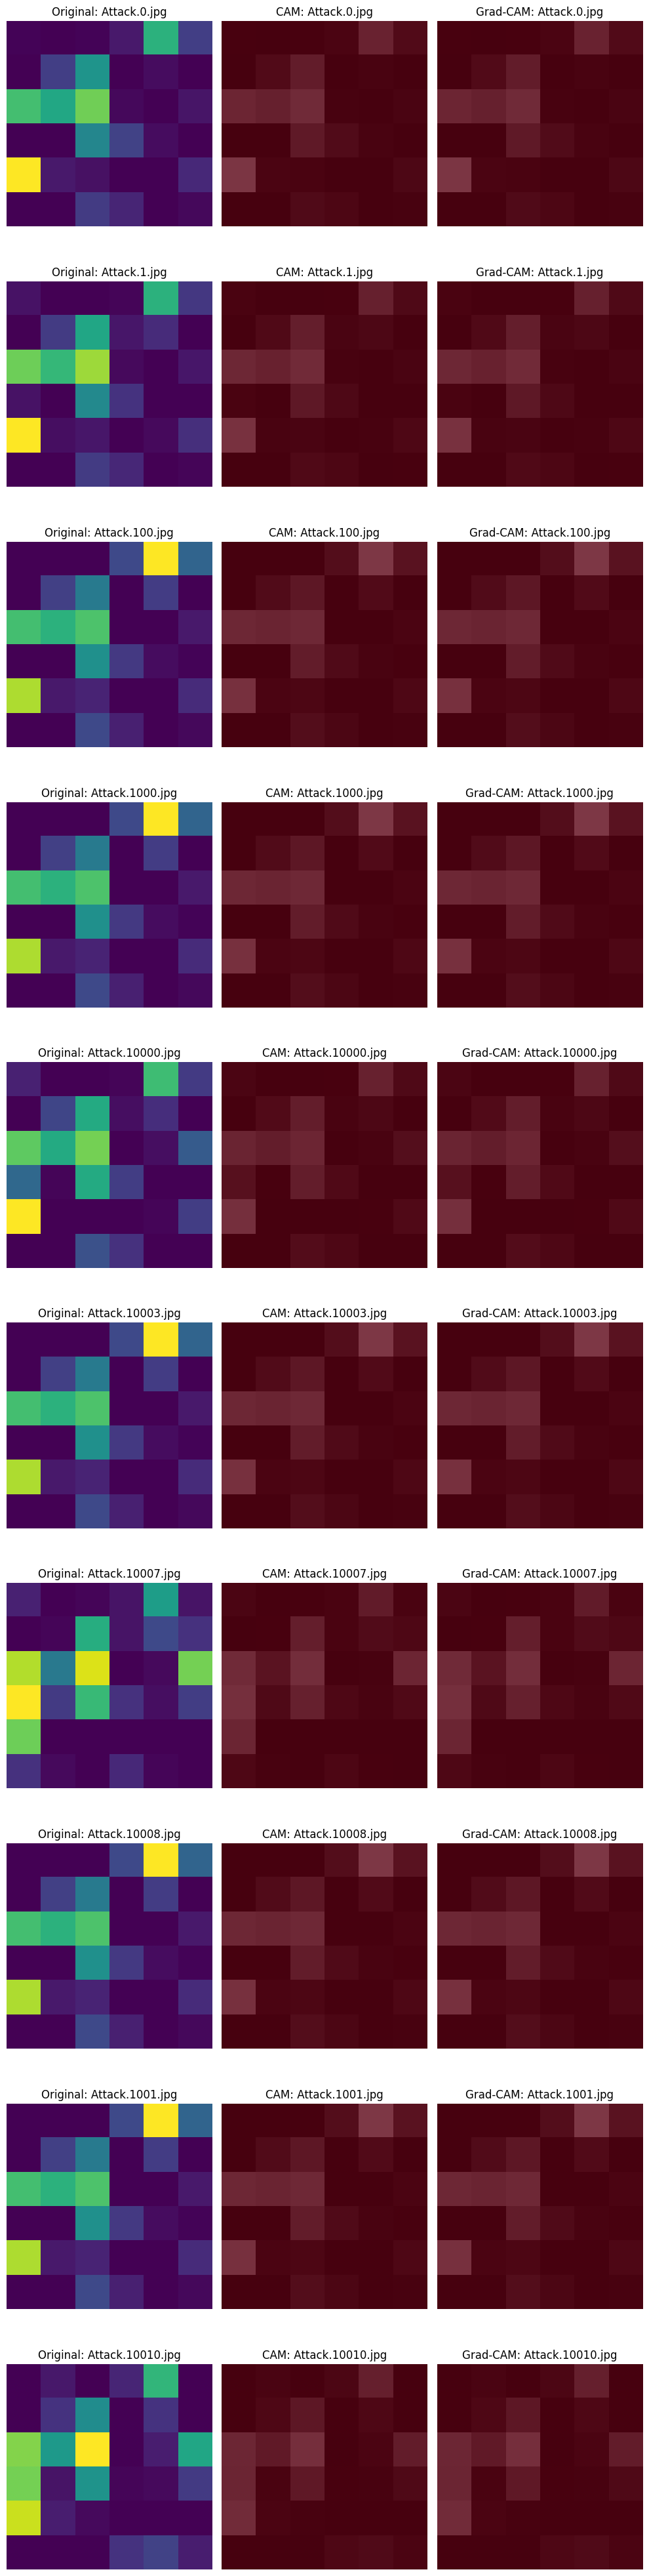

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from PIL import Image
import cv2
import os

# Assuming your InceptionV3 model is already loaded into the 'model' variable

# Function to prepare the image
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image data if your model was trained on rescaled images (e.g., 0-1 range)
    img_array /= 255.0  # Adjust if your rescaling was different
    return img_array

# Function to implement CAM
def apply_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # Assuming binary classification with a single output node (sigmoid activation)
        # If your last layer has linear activation, you might need to adjust this
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
      heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

# Function to implement Grad-CAM
def apply_gradcam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # Assuming binary classification with a single output node (sigmoid activation)
        # If your last layer has linear activation, you might need to adjust this
        loss = predictions[:, 0]


    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    # Expand pooled_grads to match the spatial dimensions of conv_outputs
    pooled_grads = pooled_grads[tf.newaxis, tf.newaxis, tf.newaxis, :]
    heatmap = conv_outputs * pooled_grads

    # Sum across the channels to get a 2D heatmap
    heatmap = tf.reduce_sum(heatmap, axis=-1)
    heatmap = tf.squeeze(heatmap)


    heatmap = tf.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
        heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()


# Function to display the image with heatmap
def display_heatmap_grid(heatmap, img_path, ax, alpha=0.4, title=""):
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    # Ensure heatmap is a numpy array before resizing
    heatmap = np.array(heatmap)

    # Resize heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    # Apply the heatmap to the original image
    cmap = matplotlib.colormaps.get_cmap()
    cmap_colors = cmap(np.arange(256))[:, :3]
    heatmap_colored = cmap_colors[heatmap] * 255

    # Convert to PIL Image for blending
    heatmap_colored_img = Image.fromarray(heatmap_colored.astype(np.uint8))
    original_img = Image.fromarray(img.astype(np.uint8))

    # Blend the images
    superimposed_img = Image.blend(original_img, heatmap_colored_img, alpha=alpha)

    ax.imshow(superimposed_img)
    ax.set_title(title)
    ax.axis('off')


# --- How to use these functions with InceptionV3 on multiple images in a grid ---

# Specify the folder path
folder_path = '/content/download1/' # Replace with the actual path to your image folder

# Specify the target size that your InceptionV3 model expects
target_image_size = (100, 100) # InceptionV3 typically uses 299x299, but your model uses 100x100

# Specify the name of the last convolutional layer in your InceptionV3 model
convolutional_layer_name = 'mixed10' # Adjust if your layer name is different

# Get list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Sort the image files for consistent selection
image_files.sort()

# Select the last 10 images
images_to_process = image_files[-10:]

# Create a grid for displaying images
num_images = len(images_to_process)
# We'll have 3 columns: Original Image, CAM, Grad-CAM
fig, axes = plt.subplots(num_images, 3, figsize=(10, num_images * 4))

# Process each selected image and display in the grid
for i, image_file in enumerate(images_to_process):
    image_path_to_visualize = os.path.join(folder_path, image_file)

    # Preprocess the image
    img_array = preprocess_image(image_path_to_visualize, target_image_size)

    # Display original image
    original_img = Image.open(image_path_to_visualize)
    axes[i, 0].imshow(original_img)
    axes[i, 0].set_title(f"Original: {image_file}")
    axes[i, 0].axis('off')

    # Generate and display CAM
    cam_heatmap = apply_cam(model, img_array, convolutional_layer_name)
    display_heatmap_grid(cam_heatmap, image_path_to_visualize, axes[i, 1], title=f"CAM: {image_file}")

    # Generate and display Grad-CAM
    gradcam_heatmap = apply_gradcam(model, img_array, convolutional_layer_name)
    display_heatmap_grid(gradcam_heatmap, image_path_to_visualize, axes[i, 2], title=f"Grad-CAM: {image_file}")

plt.tight_layout()
plt.show()

/tmp/ipython-input-76-2567231061.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)
/tmp/ipython-input-76-2567231061.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure

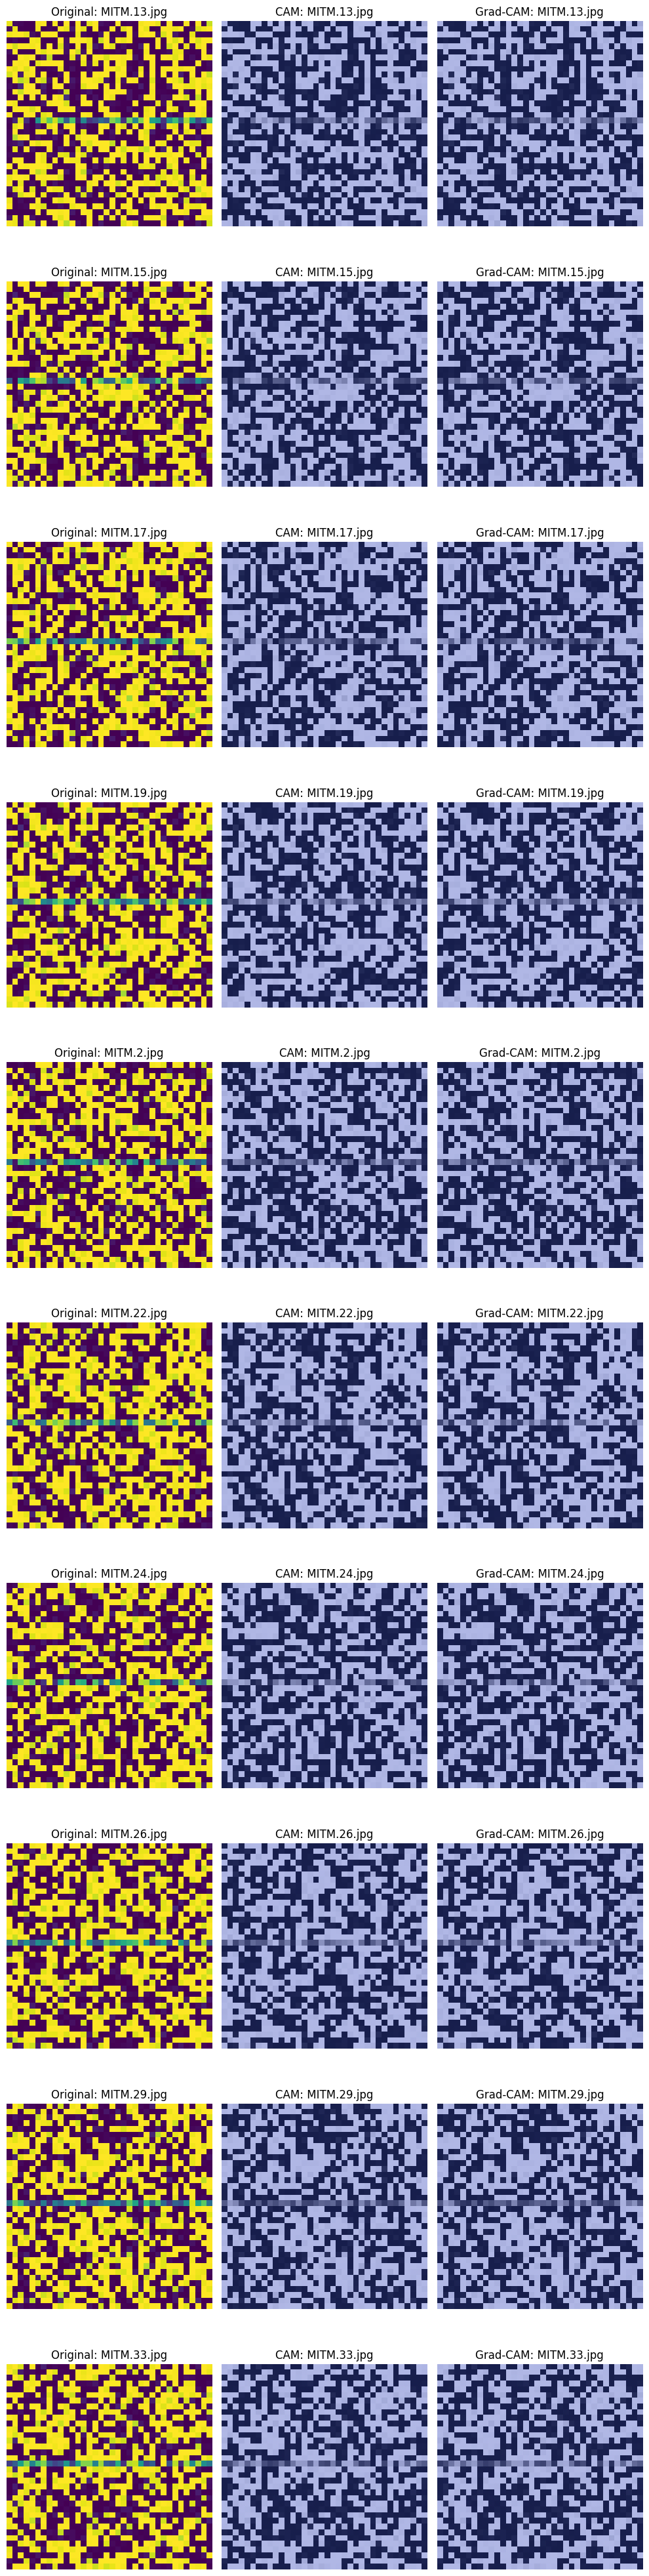

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from PIL import Image
import cv2
import os

# Assuming your InceptionV3 model is already loaded into the 'model' variable

# Function to prepare the image
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image data if your model was trained on rescaled images (e.g., 0-1 range)
    img_array /= 255.0  # Adjust if your rescaling was different
    return img_array

# Function to implement CAM
def apply_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # Assuming binary classification with a single output node (sigmoid activation)
        # If your last layer has linear activation, you might need to adjust this
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
      heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

# Function to implement Grad-CAM
def apply_gradcam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # Assuming binary classification with a single output node (sigmoid activation)
        # If your last layer has linear activation, you might need to adjust this
        loss = predictions[:, 0]


    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    # Expand pooled_grads to match the spatial dimensions of conv_outputs
    pooled_grads = pooled_grads[tf.newaxis, tf.newaxis, tf.newaxis, :]
    heatmap = conv_outputs * pooled_grads

    # Sum across the channels to get a 2D heatmap
    heatmap = tf.reduce_sum(heatmap, axis=-1)
    heatmap = tf.squeeze(heatmap)


    heatmap = tf.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
        heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()


# Function to display the image with heatmap
def display_heatmap_grid(heatmap, img_path, ax, alpha=0.4, title=""):
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    # Ensure heatmap is a numpy array before resizing
    heatmap = np.array(heatmap)

    # Resize heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    # Apply the heatmap to the original image
    cmap = plt.cm.get_cmap("coolwarm")
    cmap_colors = cmap(np.arange(256))[:, :3]
    heatmap_colored = cmap_colors[heatmap] * 255

    # Convert to PIL Image for blending
    heatmap_colored_img = Image.fromarray(heatmap_colored.astype(np.uint8))
    original_img = Image.fromarray(img.astype(np.uint8))

    # Blend the images
    superimposed_img = Image.blend(original_img, heatmap_colored_img, alpha=alpha)

    ax.imshow(superimposed_img)
    ax.set_title(title)
    ax.axis('off')


# --- How to use these functions with InceptionV3 on multiple images in a grid ---

# Specify the folder path
folder_path = '/content/download2/' # Replace with the actual path to your image folder

# Specify the target size that your InceptionV3 model expects
target_image_size = (100, 100) # InceptionV3 typically uses 299x299, but your model uses 100x100

# Specify the name of the last convolutional layer in your InceptionV3 model
convolutional_layer_name = 'mixed10' # Adjust if your layer name is different

# Get list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Sort the image files for consistent selection
image_files.sort()

# Select the first 10 images
images_to_process = image_files[-10:]

# Create a grid for displaying images
num_images = len(images_to_process)
# We'll have 3 columns: Original Image, CAM, Grad-CAM
fig, axes = plt.subplots(num_images, 3, figsize=(10, num_images * 4))

# Process each selected image and display in the grid
for i, image_file in enumerate(images_to_process):
    image_path_to_visualize = os.path.join(folder_path, image_file)

    # Preprocess the image
    img_array = preprocess_image(image_path_to_visualize, target_image_size)

    # Display original image
    original_img = Image.open(image_path_to_visualize)
    axes[i, 0].imshow(original_img)
    axes[i, 0].set_title(f"Original: {image_file}")
    axes[i, 0].axis('off')

    # Generate and display CAM
    cam_heatmap = apply_cam(model, img_array, convolutional_layer_name)
    display_heatmap_grid(cam_heatmap, image_path_to_visualize, axes[i, 1], title=f"CAM: {image_file}")

    # Generate and display Grad-CAM
    gradcam_heatmap = apply_gradcam(model, img_array, convolutional_layer_name)
    display_heatmap_grid(gradcam_heatmap, image_path_to_visualize, axes[i, 2], title=f"Grad-CAM: {image_file}")

plt.tight_layout()
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from datetime import datetime
import os

# Assuming the model has been loaded and test_image_generator is available

# Start the timer
start_time = datetime.now()

predictions = model.predict(test_image_generator)

# Stop the timer
end_time = datetime.now()
elapsed_time = end_time - start_time

print(f"Inference time: {elapsed_time}")


best_accuracy = 0
best_threshold = 0
best_report = ""

# Calculate ROC AUC directly
true_labels = test_image_generator.classes  # Get true labels once outside the loop
roc_auc = roc_auc_score(true_labels, predictions)  # Use roc_auc_score

# Get predicted labels based on a default threshold (e.g., 0.5) or the best threshold found later
predicted_labels = (predictions > 0.5).astype(int)


# Identify correctly classified images
correctly_classified_indices = np.where(predicted_labels.flatten() == true_labels)[0]

# Get the filenames of the correctly classified images
# The filenames are available in the test_image_generator
# Assuming the folder path is the one used to create the test_image_generator
folder_path = '/content/generated_36x36_test_images' # Replace with the actual path to your image folder
correctly_classified_filenames = [os.path.basename(test_image_generator.filenames[i]) for i in correctly_classified_indices]

print("\nCorrectly Classified Images:")
# Print only the first 10 filenames if there are many
for i, filename in enumerate(correctly_classified_filenames):
    if i < 10:
        print(filename)
    else:
        print("...")
        break


for threshold in np.arange(0.1, 1.0, 0.1):
    predicted_labels_threshold = (predictions > threshold).astype(int)

    accuracy = accuracy_score(true_labels, predicted_labels_threshold)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_report = classification_report(true_labels, predicted_labels_threshold)


print(f"\nBest Accuracy: {best_accuracy} at Threshold: {best_threshold}")
print(f"ROC AUC: {roc_auc}")  # Print ROC AUC
print("Best Classification Report:\n", best_report)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step
Inference time: 0:00:02.705449

Correctly Classified Images:
Normal.0.jpg
Normal.30.jpg
Normal.21.jpg
Normal.28.jpg
Normal.18.jpg
Normal.35.jpg
Normal.14.jpg
Normal.12.jpg
Normal.1.jpg
Normal.39.jpg
...

Best Accuracy: 0.56 at Threshold: 0.4
ROC AUC: 0.5619967793880837
Best Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.89      0.69        27
           1       0.57      0.17      0.27        23

    accuracy                           0.56        50
   macro avg       0.56      0.53      0.48        50
weighted avg       0.56      0.56      0.49        50



In [ ]:
import numpy as np
from PIL import Image
import os
import pandas as pd # Assuming X_test and y_test are from pandas DataFrames/Series

# --- Configuration for Image Generation ---
IMAGE_SIZE = 36 # The target image will be 36x36 pixels
NUM_FEATURES = 36 # Expecting exactly 36 features per sample
FEATURE_ROW_INDEX = 17 # 0-indexed, so 17 corresponds to the 18th row

# Labels mapping for saving files (assuming y_test has 0s and 1s)
labels = ["Normal", "MITM"] # Using "MITM" here as per previous context for Attack

# --- Dummy Data for Demonstration ---
# In your actual code, X_test and y_test would come from your loaded dataset.
# X_test should contain your features (e.g., 36 features per sample).
num_test_samples = 10000 # Number of test samples to process

# Create dummy X_test (random feature values between 0 and 255)
X_test_data = np.random.randint(0, 256, size=(num_test_samples, NUM_FEATURES), dtype=np.uint8)
X_test = pd.DataFrame(X_test_data) # Convert to DataFrame to match .iloc usage in loop

# Create dummy y_test (random labels 0 or 1)
y_test_data = np.random.randint(0, len(labels), size=num_test_samples)
y_test = pd.Series(y_test_data)    # Convert to Series to match .iloc usage in loop
# --- End Dummy Data (Remove/Comment out for your actual data) ---


# --- Setup Output Directory ---
# Change to the desired base directory
os.chdir("/content/")
output_dir_test = "download2"
if not os.path.exists(output_dir_test):
    os.makedirs(output_dir_test)
os.chdir(output_dir_test) # Change current working directory to the output folder


# --- Feature to Image Conversion Loop for Test Data ---
print(f"Starting test image generation into '{output_dir_test}/'...")
print(f"Target Image Dimensions: {IMAGE_SIZE}x{IMAGE_SIZE}")
print(f"Features will be placed in row (0-indexed): {FEATURE_ROW_INDEX}")

# Iterate over each sample (row) in the X_test DataFrame
for i in range(X_test.shape[0]):
    # Get the 1D array of feature values for the current test sample
    # This is the line you provided, adapted for X_test
    # Note: If X_test.iloc[i] is already a 1D array of uint8, you might not need .view(np.uint8)
    # and unpackbits might not be necessary if features are already in 0-255 range directly.
    # Assuming features are already in a suitable numerical format (0-255 range)
    # If your features are not already uint8, ensure they are converted correctly.
    current_features_raw = X_test.iloc[i].values

    # --- Original logic from your previous code snippet (if features are bit-packed) ---
    # If your features are bit-packed and need unpacking then repacking:
    # binary_values = np.unpackbits(current_features_raw.view(np.uint8))
    # grouped_values = np.packbits(binary_values.reshape(-1, 8))
    # current_features = grouped_values
    # --- END Original logic ---

    # Assuming current_features_raw is already the 1D array of 0-255 values (e.g., from CICFlowMeter)
    current_features = current_features_raw


    # Ensure the number of features matches the expected size for the row
    if len(current_features) != IMAGE_SIZE:
        print(f"Warning: Test sample {i} has {len(current_features)} features, expected {IMAGE_SIZE}. Padding/truncating.")
        if len(current_features) < IMAGE_SIZE:
            current_features = np.pad(current_features, (0, IMAGE_SIZE - len(current_features)), 'constant', constant_values=0)
        else:
            current_features = current_features[:IMAGE_SIZE]

    # --- Create the 36x36 image array ---
    # Initialize the entire image with random 0 or 255 values
    image_data = np.random.choice([0, 255], size=(IMAGE_SIZE, IMAGE_SIZE)).astype(np.uint8)

    # Place the actual features into the specified row (18th row, 0-indexed 17)
    image_data[FEATURE_ROW_INDEX, :] = current_features.astype(np.uint8)

    # --- Determine the label and save the image ---
    current_label_index = y_test.iloc[i]
    current_label_name = labels[current_label_index]

    # Create a PIL Image object from the numpy array and save it as JPEG
    image = Image.fromarray(image_data, mode='L') # 'L' mode for grayscale
    image.save(f'{current_label_name}.{i}.jpg', "JPEG")

    print(f"Saved {current_label_name}.{i}.jpg with shape {image_data.shape}")

print("\nTest image generation complete for all samples.")


Streaming output truncated to the last 5000 lines.
Saved Normal.5002.jpg with shape (36, 36)
Saved MITM.5003.jpg with shape (36, 36)
Saved MITM.5004.jpg with shape (36, 36)
Saved MITM.5005.jpg with shape (36, 36)
Saved MITM.5006.jpg with shape (36, 36)
Saved MITM.5007.jpg with shape (36, 36)
Saved MITM.5008.jpg with shape (36, 36)
Saved Normal.5009.jpg with shape (36, 36)
Saved Normal.5010.jpg with shape (36, 36)
Saved Normal.5011.jpg with shape (36, 36)
Saved MITM.5012.jpg with shape (36, 36)
Saved MITM.5013.jpg with shape (36, 36)
Saved Normal.5014.jpg with shape (36, 36)
Saved MITM.5015.jpg with shape (36, 36)
Saved Normal.5016.jpg with shape (36, 36)
Saved MITM.5017.jpg with shape (36, 36)
Saved MITM.5018.jpg with shape (36, 36)
Saved Normal.5019.jpg with shape (36, 36)
Saved MITM.5020.jpg with shape (36, 36)
Saved Normal.5021.jpg with shape (36, 36)
Saved Normal.5022.jpg with shape (36, 36)
Saved MITM.5023.jpg with shape (36, 36)
Saved MITM.5024.jpg with shape (36, 36)
Saved MITM.

In [ ]:
import numpy as np
from PIL import Image
import os
import pandas as pd # Assuming X_test and y_test are from pandas DataFrames/Series

# --- Configuration for Image Generation ---
IMAGE_SIZE = 36 # The target image will be 36x36 pixels
NUM_FEATURES = 36 # Expecting exactly 36 features per sample
FEATURE_ROW_INDEX = 17 # 0-indexed, so 17 corresponds to the 18th row

# Labels mapping for saving files (assuming y_test has 0s and 1s)
labels = ["Normal", "MITM"] # Using "MITM" here as per previous context for Attack

# --- Dummy Data for Demonstration ---
# In your actual code, X_test and y_test would come from your loaded dataset.
# X_test should contain your features (e.g., 36 features per sample).
num_test_samples = 20000 # Number of test samples to process

# Create dummy X_test (random feature values between 0 and 255)
X_train_data = np.random.randint(0, 256, size=(num_test_samples, NUM_FEATURES), dtype=np.uint8)
X_train = pd.DataFrame(X_train_data) # Convert to DataFrame to match .iloc usage in loop

# Create dummy y_test (random labels 0 or 1)
y_train_data = np.random.randint(0, len(labels), size=num_test_samples)
y_train = pd.Series(y_train_data)    # Convert to Series to match .iloc usage in loop
# --- End Dummy Data (Remove/Comment out for your actual data) ---


# --- Setup Output Directory ---
# Change to the desired base directory
os.chdir("/content/")
output_dir_test = "download1"
if not os.path.exists(output_dir_test):
    os.makedirs(output_dir_test)
os.chdir(output_dir_test) # Change current working directory to the output folder


# --- Feature to Image Conversion Loop for Test Data ---
print(f"Starting test image generation into '{output_dir_test}/'...")
print(f"Target Image Dimensions: {IMAGE_SIZE}x{IMAGE_SIZE}")
print(f"Features will be placed in row (0-indexed): {FEATURE_ROW_INDEX}")

# Iterate over each sample (row) in the X_test DataFrame
for i in range(X_train.shape[0]):
    # Get the 1D array of feature values for the current test sample
    # This is the line you provided, adapted for X_test
    # Note: If X_test.iloc[i] is already a 1D array of uint8, you might not need .view(np.uint8)
    # and unpackbits might not be necessary if features are already in 0-255 range directly.
    # Assuming features are already in a suitable numerical format (0-255 range)
    # If your features are not already uint8, ensure they are converted correctly.
    current_features_raw = X_train.iloc[i].values

    # --- Original logic from your previous code snippet (if features are bit-packed) ---
    # If your features are bit-packed and need unpacking then repacking:
    # binary_values = np.unpackbits(current_features_raw.view(np.uint8))
    # grouped_values = np.packbits(binary_values.reshape(-1, 8))
    # current_features = grouped_values
    # --- END Original logic ---

    # Assuming current_features_raw is already the 1D array of 0-255 values (e.g., from CICFlowMeter)
    current_features = current_features_raw


    # Ensure the number of features matches the expected size for the row
    if len(current_features) != IMAGE_SIZE:
        print(f"Warning: Test sample {i} has {len(current_features)} features, expected {IMAGE_SIZE}. Padding/truncating.")
        if len(current_features) < IMAGE_SIZE:
            current_features = np.pad(current_features, (0, IMAGE_SIZE - len(current_features)), 'constant', constant_values=0)
        else:
            current_features = current_features[:IMAGE_SIZE]

    # --- Create the 36x36 image array ---
    # Initialize the entire image with random 0 or 255 values
    image_data = np.random.choice([0, 255], size=(IMAGE_SIZE, IMAGE_SIZE)).astype(np.uint8)

    # Place the actual features into the specified row (18th row, 0-indexed 17)
    image_data[FEATURE_ROW_INDEX, :] = current_features.astype(np.uint8)

    # --- Determine the label and save the image ---
    current_label_index = y_test.iloc[i]
    current_label_name = labels[current_label_index]

    # Create a PIL Image object from the numpy array and save it as JPEG
    image = Image.fromarray(image_data, mode='L') # 'L' mode for grayscale
    image.save(f'{current_label_name}.{i}.jpg', "JPEG")

    print(f"Saved {current_label_name}.{i}.jpg with shape {image_data.shape}")

print("\nTest image generation complete for all samples.")


In [ ]:
import numpy as np
from PIL import Image
import os
import pandas as pd # Assuming X_test and y_test are from pandas DataFrames/Series

# --- Configuration for Image Generation ---
IMAGE_SIZE = 36 # The target image will be 36x36 pixels
NUM_FEATURES = 36 # Expecting exactly 36 features per sample
FEATURE_ROW_INDEX = 17 # 0-indexed, so 17 corresponds to the 18th row

# Labels mapping for saving files (assuming y_test has 0s and 1s)
labels = ["Normal", "MITM"] # Using "MITM" here as per previous context for Attack

# --- Dummy Data for Demonstration ---
# In your actual code, X_test and y_test would come from your loaded dataset.
# X_test should contain your features (e.g., 36 features per sample).
num_test_samples = 20000 # Number of test samples to process

# Create dummy X_test (random feature values between 0 and 255)
X_val_data = np.random.randint(0, 256, size=(num_test_samples, NUM_FEATURES), dtype=np.uint8)
X_train = pd.DataFrame(X_train_data) # Convert to DataFrame to match .iloc usage in loop

# Create dummy y_test (random labels 0 or 1)
y_train_data = np.random.randint(0, len(labels), size=num_test_samples)
y_train = pd.Series(y_train_data)    # Convert to Series to match .iloc usage in loop
# --- End Dummy Data (Remove/Comment out for your actual data) ---


# --- Setup Output Directory ---
# Change to the desired base directory
os.chdir("/content/")
output_dir_test = "download1val"
if not os.path.exists(output_dir_test):
    os.makedirs(output_dir_test)
os.chdir(output_dir_test) # Change current working directory to the output folder


# --- Feature to Image Conversion Loop for Test Data ---
print(f"Starting test image generation into '{output_dir_test}/'...")
print(f"Target Image Dimensions: {IMAGE_SIZE}x{IMAGE_SIZE}")
print(f"Features will be placed in row (0-indexed): {FEATURE_ROW_INDEX}")

# Iterate over each sample (row) in the X_test DataFrame
for i in range(X_train.shape[0]):
    # Get the 1D array of feature values for the current test sample
    # This is the line you provided, adapted for X_test
    # Note: If X_test.iloc[i] is already a 1D array of uint8, you might not need .view(np.uint8)
    # and unpackbits might not be necessary if features are already in 0-255 range directly.
    # Assuming features are already in a suitable numerical format (0-255 range)
    # If your features are not already uint8, ensure they are converted correctly.
    current_features_raw = X_train.iloc[i].values

    # --- Original logic from your previous code snippet (if features are bit-packed) ---
    # If your features are bit-packed and need unpacking then repacking:
    # binary_values = np.unpackbits(current_features_raw.view(np.uint8))
    # grouped_values = np.packbits(binary_values.reshape(-1, 8))
    # current_features = grouped_values
    # --- END Original logic ---

    # Assuming current_features_raw is already the 1D array of 0-255 values (e.g., from CICFlowMeter)
    current_features = current_features_raw


    # Ensure the number of features matches the expected size for the row
    if len(current_features) != IMAGE_SIZE:
        print(f"Warning: Test sample {i} has {len(current_features)} features, expected {IMAGE_SIZE}. Padding/truncating.")
        if len(current_features) < IMAGE_SIZE:
            current_features = np.pad(current_features, (0, IMAGE_SIZE - len(current_features)), 'constant', constant_values=0)
        else:
            current_features = current_features[:IMAGE_SIZE]

    # --- Create the 36x36 image array ---
    # Initialize the entire image with random 0 or 255 values
    image_data = np.random.choice([0, 255], size=(IMAGE_SIZE, IMAGE_SIZE)).astype(np.uint8)

    # Place the actual features into the specified row (18th row, 0-indexed 17)
    image_data[FEATURE_ROW_INDEX, :] = current_features.astype(np.uint8)

    # --- Determine the label and save the image ---
    current_label_index = y_test.iloc[i]
    current_label_name = labels[current_label_index]

    # Create a PIL Image object from the numpy array and save it as JPEG
    image = Image.fromarray(image_data, mode='L') # 'L' mode for grayscale
    image.save(f'{current_label_name}.{i}.jpg', "JPEG")

    print(f"Saved {current_label_name}.{i}.jpg with shape {image_data.shape}")

print("\nTest image generation complete for all samples.")


In [ ]:
os.chdir("/content/")


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_first_image_in_folder(folder_path):
    """Displays the first image file found in a folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in {folder_path}")
        return

    # Get the path of the first image file
    first_image_path = os.path.join(folder_path, image_files[0])

    try:
        img = Image.open(first_image_path)
        plt.imshow(img)
        plt.title(image_files[0])
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading or displaying image {image_files[0]}: {e}")

# Specify the folder path
folder_path_to_display = '/content/download2/Attack.100.jpg'

# Display the first image
display_first_image_in_folder(folder_path_to_display)

NotADirectoryError: [Errno 20] Not a directory: '/content/download2/Attack.100.jpg'

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]


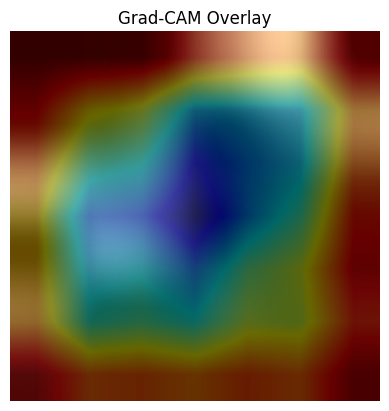

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

# Load a pretrained model or your custom CNN
model = models.resnet18(pretrained=True)
model.eval()

# Hook the gradients
gradients = []

def save_gradient(grad):
    gradients.append(grad)

# Choose the target convolutional layer
target_layer = model.layer4[1].conv2

# Register forward hook
activations = []

def forward_hook(module, input, output):
    activations.append(output)
    output.register_hook(save_gradient)

target_layer.register_forward_hook(forward_hook)

# Load and preprocess the image
img = Image.open("/content/download1/Normal.10002.jpg").convert('RGB')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
input_tensor = transform(img).unsqueeze(0)

# Forward pass
output = model(input_tensor)
class_idx = torch.argmax(output)

# Backward pass for the target class
model.zero_grad()
output[0, class_idx].backward()

# Get activations and gradients
act = activations[0].squeeze().detach().numpy()
grad = gradients[0].squeeze().detach().numpy()

# Compute weights
weights = np.mean(grad, axis=(1, 2))

# Compute Grad-CAM
cam = np.zeros(act.shape[1:], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * act[i]

cam = np.maximum(cam, 0)
cam = cv2.resize(cam, (224, 224))
cam = cam - cam.min()
cam = cam / cam.max()

# Overlay CAM on image
img_np = np.array(img.resize((224, 224))) / 255.0
heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
overlay = 0.4 * heatmap / 255.0 + 0.6 * img_np

# Plot
plt.imshow(overlay)
plt.title("Grad-CAM Overlay")
plt.axis("off")
plt.show()


In [ ]:
# Assuming 'model' is your trained classification model and 'test_image_generator' is set up for generated normal images

# Get predictions for the generated normal images
normal_predictions = model.predict(train_image_generator1)

# Analyze the distribution of predictions for normal traffic
# We can look at the minimum, maximum, mean, and standard deviation
normal_min_pred = np.min(normal_predictions)
normal_max_pred = np.max(normal_predictions)
normal_mean_pred = np.mean(normal_predictions)
normal_std_pred = np.std(normal_predictions)

print(f"Normal Predictions - Min: {normal_min_pred:.4f}, Max: {normal_max_pred:.4f}, Mean: {normal_mean_pred:.4f}, Std Dev: {normal_std_pred:.4f}")

# You can also visualize the distribution of predictions for normal traffic using a histogram
plt.figure(figsize=(8, 6))
plt.hist(normal_predictions, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Distribution of Model Predictions for Normal Images')
plt.xlabel('Prediction Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# A simple approach to setting a threshold is to use a percentile of the normal predictions,
# or a value based on the mean and standard deviation.
# For example, setting the threshold at the mean + 2 * standard deviations
suggested_threshold = normal_mean_pred + 2 * normal_std_pred

print(f"Suggested threshold (Mean + 2*StdDev): {suggested_threshold:.4f}")

# You might want to experiment with different thresholding strategies
# (e.g., using percentiles like the 95th or 99th percentile)
# percentile_95 = np.percentile(normal_predictions, 95)
# print(f"95th percentile of Normal Predictions: {percentile_95:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 136s 529ms/step
Normal Predictions - Min: 0.0000, Max: 0.9228, Mean: 0.0154, Std Dev: 0.0510


TypeError: 'module' object is not callable

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();